# Searchlight Merged Results Visualization

Meaningful visualization focused on statistically significant results (q ≤ 0.05).


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns

BASE = Path('/Users/xiaoqianxiao/projects/NARSAD/LSS/searchlight')
DIRS = {
    'ext': BASE / 'ext' / 'merged' / 'permutation',
    'rst': BASE / 'rst' / 'merged' / 'permutation',
    'dyn_ext': BASE / 'dyn_ext' / 'merged' / 'permutation',
    'dyn_rst': BASE / 'dyn_rst' / 'merged' / 'permutation',
    'crossphase': BASE / 'crossphase' / 'merged' / 'permutation',
}

for k, v in DIRS.items():
    print(f"{k}: {v} (exists={v.exists()})")


ext: /Users/xiaoqianxiao/projects/NARSAD/LSS/searchlight/ext/merged/permutation (exists=True)
rst: /Users/xiaoqianxiao/projects/NARSAD/LSS/searchlight/rst/merged/permutation (exists=True)
dyn_ext: /Users/xiaoqianxiao/projects/NARSAD/LSS/searchlight/dyn_ext/merged/permutation (exists=True)
dyn_rst: /Users/xiaoqianxiao/projects/NARSAD/LSS/searchlight/dyn_rst/merged/permutation (exists=True)
crossphase: /Users/xiaoqianxiao/projects/NARSAD/LSS/searchlight/crossphase/merged/permutation (exists=True)


## Helpers


In [2]:
def list_files(folder: Path, pattern: str):
    return sorted(folder.glob(pattern)) if folder.exists() else []


def _is_3d(img):
    return len(img.shape) == 3


def load_validmask(effect_path: Path, q_path: Path) -> np.ndarray | None:
    base = q_path.name.replace('_q.nii.gz', '')
    vm = effect_path.parent / f"{base}_validmask.nii.gz"
    if vm.exists():
        return nib.load(str(vm)).get_fdata() > 0
    return None


def plot_effect_with_q(effect_path: Path, q_path: Path, title: str, cmap: str = 'RdBu_r', q_thresh: float = 0.05):
    effect_img = nib.load(str(effect_path))
    q_img = nib.load(str(q_path))
    if not _is_3d(effect_img) or not _is_3d(q_img):
        print(f"Skip non-3D image: {effect_path.name} or {q_path.name}")
        return None
    effect_data = effect_img.get_fdata()
    q_data = q_img.get_fdata()
    valid = load_validmask(effect_path, q_path)
    if valid is not None:
        q_data = np.where(valid, q_data, np.nan)
    masked = np.where((q_data <= q_thresh) & np.isfinite(q_data), effect_data, 0.0)
    out_img = nib.Nifti1Image(masked, effect_img.affine)
    display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
    return display


def show_csv(path: Path, n: int = 10):
    if not path.exists():
        print(f"Missing: {path}")
        return None
    df = pd.read_csv(path)
    display(df.head(n))
    print(f"Rows: {len(df)}")
    return df


## EXT / RST: Significant Maps Only



=== EXT ===
q maps: 15


/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: empty mask
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)



diff_CS-_SAD-HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,GroupA,GroupB


Rows: 0

diff_CSR_SAD-HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,GroupA,GroupB


Rows: 0

diff_CSS_SAD-HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,GroupA,GroupB


Rows: 0

mod_CS-_HC_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CS-_SAD_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group
0,-36.0,-30.0,21.0,-0.062931,0.048190,48\t17Networks_LH_SomMotB_S2_2\t43\t204\t162\t0,48,Schaefer,modulation,CS-,SAD
1,-36.0,-27.0,21.0,-0.059031,0.036993,48\t17Networks_LH_SomMotB_S2_2\t43\t204\t162\t0,48,Schaefer,modulation,CS-,SAD
2,-33.0,-27.0,18.0,-0.055123,0.044591,48\t17Networks_LH_SomMotB_S2_2\t43\t204\t162\t0,48,Schaefer,modulation,CS-,SAD


Rows: 3

mod_CSR_HC_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group
0,-39.0,-90.0,18.0,0.062122,0.048990,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC
1,-36.0,-90.0,9.0,0.062580,0.047191,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC
2,-36.0,-87.0,15.0,0.061015,0.045391,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC
3,-36.0,-87.0,18.0,0.061495,0.047391,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC
4,-36.0,-84.0,15.0,0.077322,0.030994,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC
5,-36.0,-84.0,18.0,0.071793,0.030994,65\t17Networks_LH_DorsAttnA_ParOcc_2\t74\t156\...,65,Schaefer,modulation,CSR,HC
6,-33.0,-87.0,9.0,0.069478,0.047391,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC
7,-33.0,-84.0,15.0,0.063374,0.042991,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC
8,-33.0,-84.0,18.0,0.068111,0.031994,65\t17Networks_LH_DorsAttnA_ParOcc_2\t74\t156\...,65,Schaefer,modulation,CSR,HC
9,-33.0,-81.0,15.0,0.072804,0.032793,10\t17Networks_LH_VisCent_ExStr_9\t120\t18\t14...,10,Schaefer,modulation,CSR,HC


Rows: 11

mod_CSR_SAD_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CSS_HC_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CSS_SAD_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CS-_HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CS-_SAD_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSR_HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSR_SAD_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSS_HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSS_SAD_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

=== RST ===
q maps: 15


/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: empty mask
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
/Users/xiaoqianxiao/fsl/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize, facecolor=facecolor)



diff_CS-_SAD-HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,GroupA,GroupB


Rows: 0

diff_CSR_SAD-HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,GroupA,GroupB


Rows: 0

diff_CSS_SAD-HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,GroupA,GroupB


Rows: 0

mod_CS-_HC_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CS-_SAD_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CSR_HC_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CSR_SAD_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CSS_HC_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

mod_CSS_SAD_OXT-PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CS-_HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CS-_SAD_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSR_HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSR_SAD_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSS_HC_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0

within_CSS_SAD_PLC_sig.csv


,x,y,z,effect,q,Name,LabelID,Atlas,contrast,Condition,Group


Rows: 0


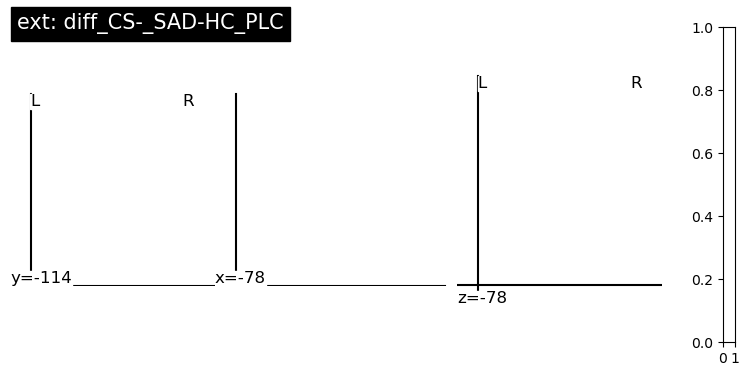

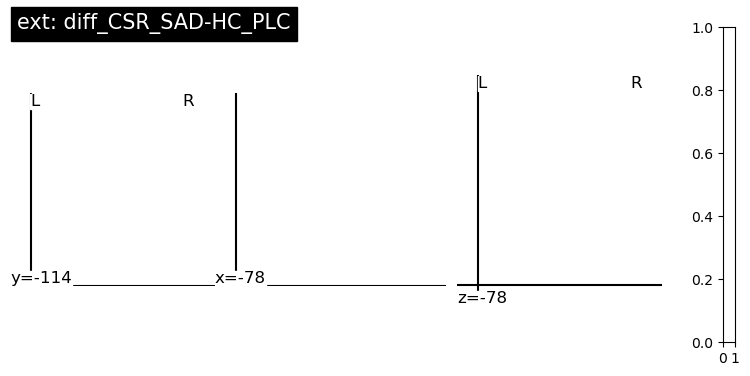

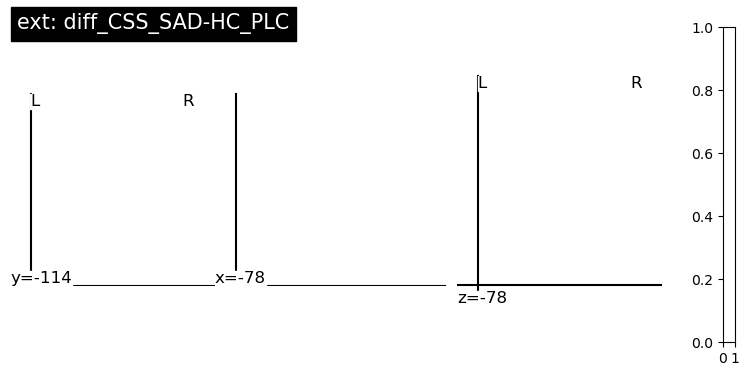

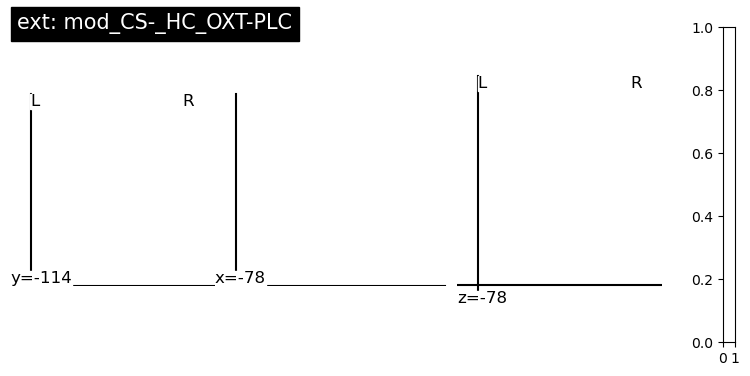

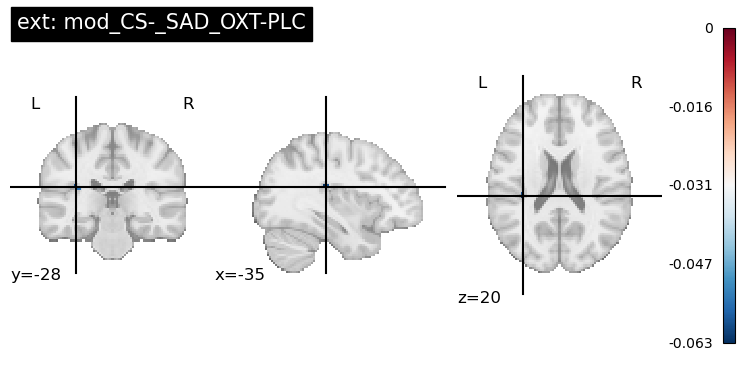

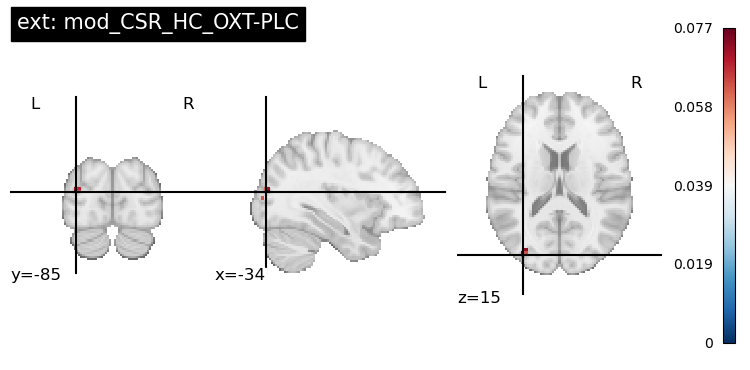

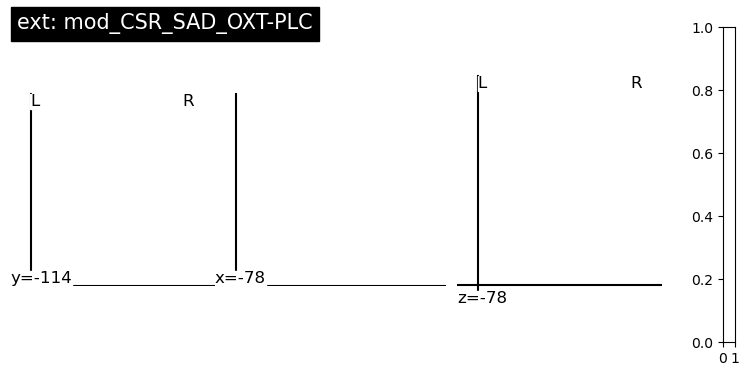

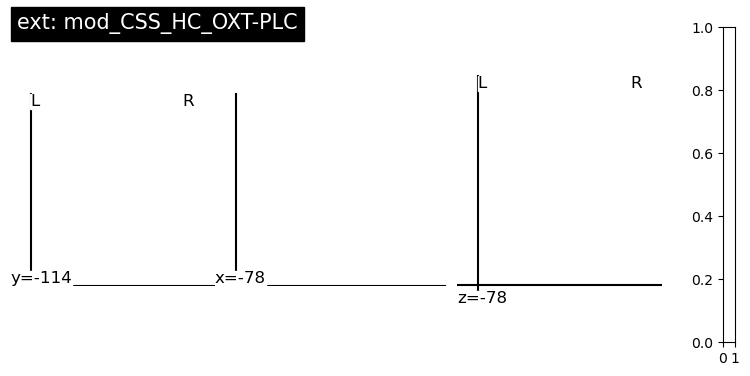

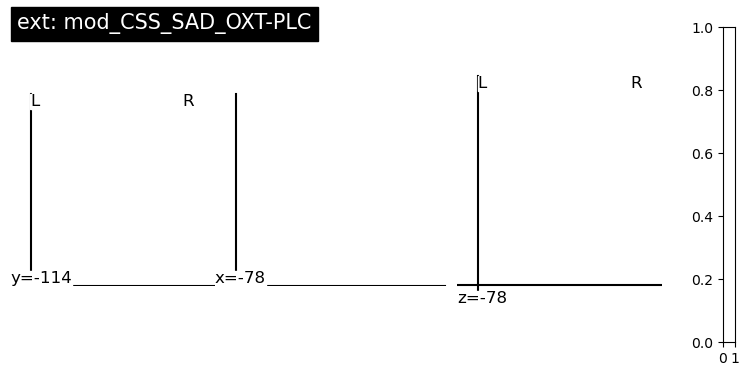

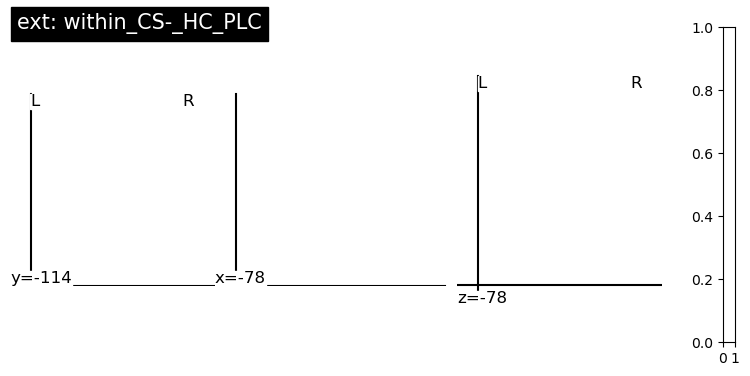

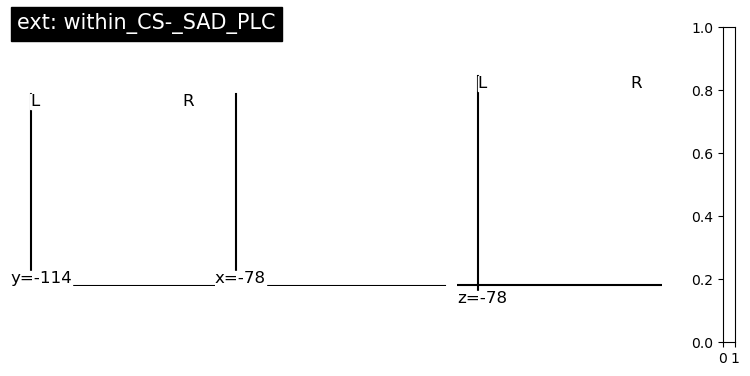

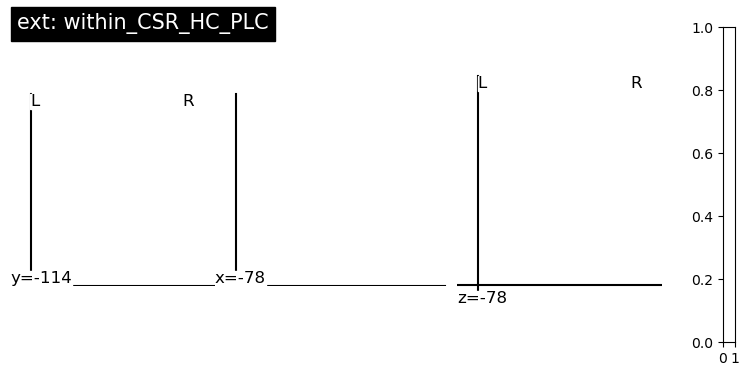

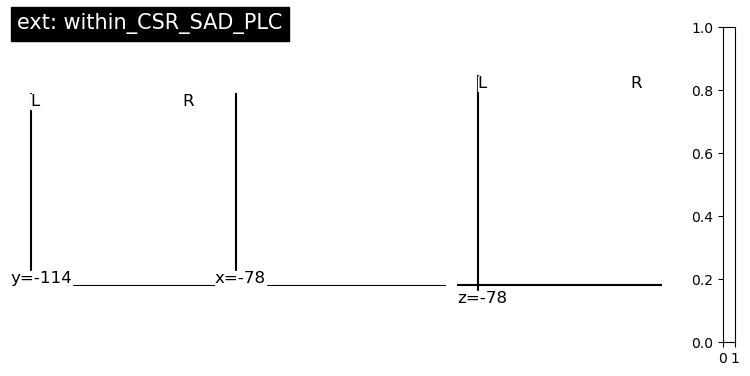

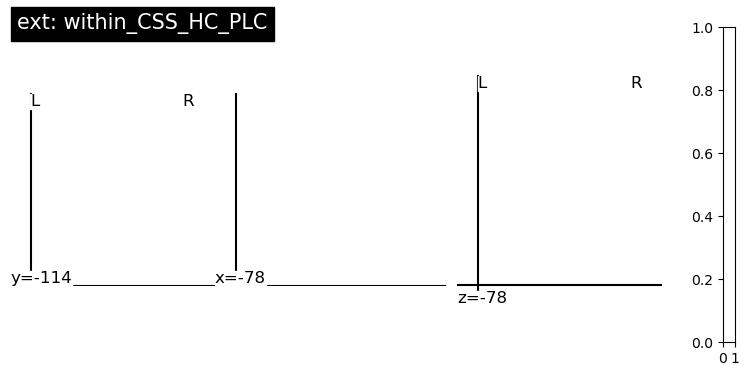

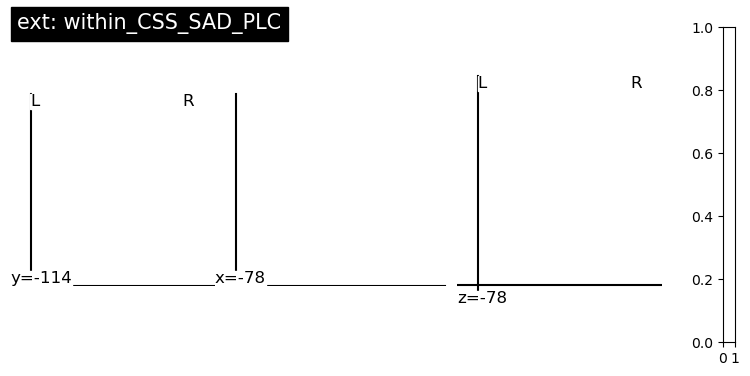

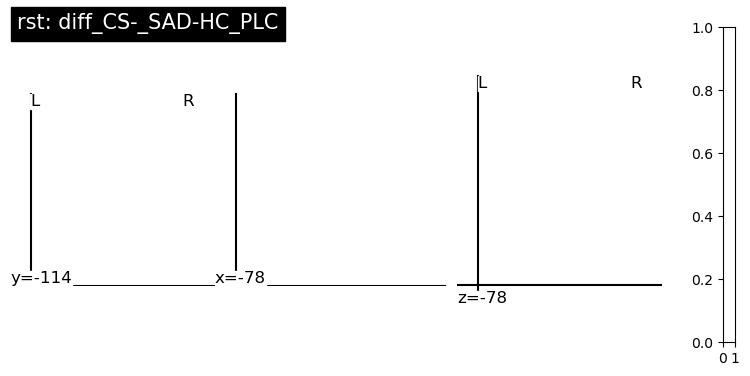

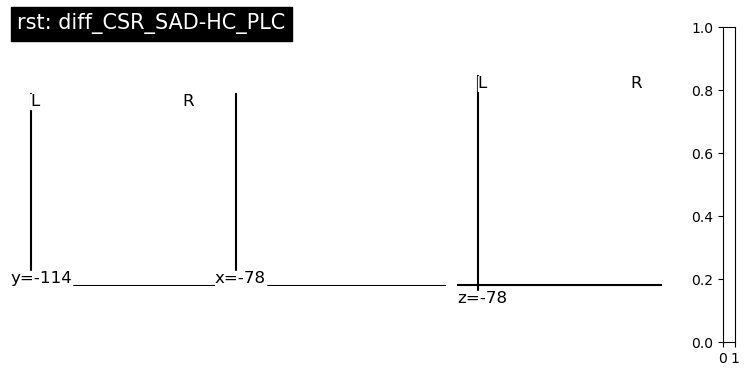

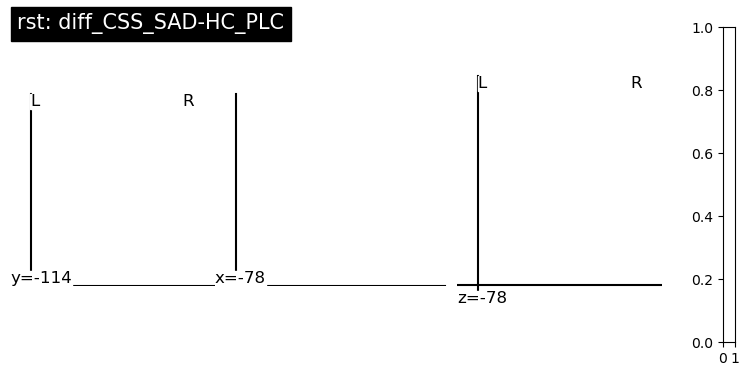

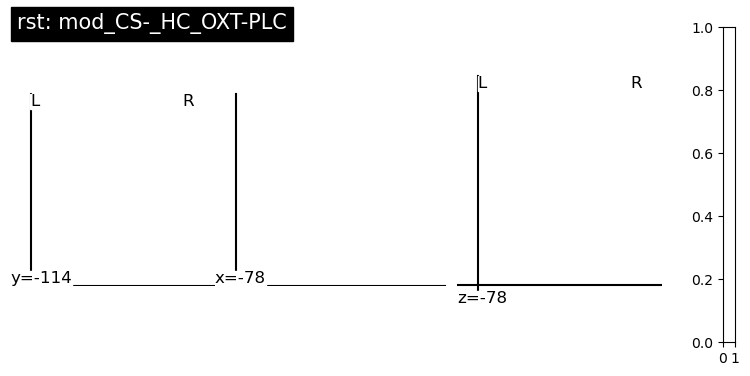

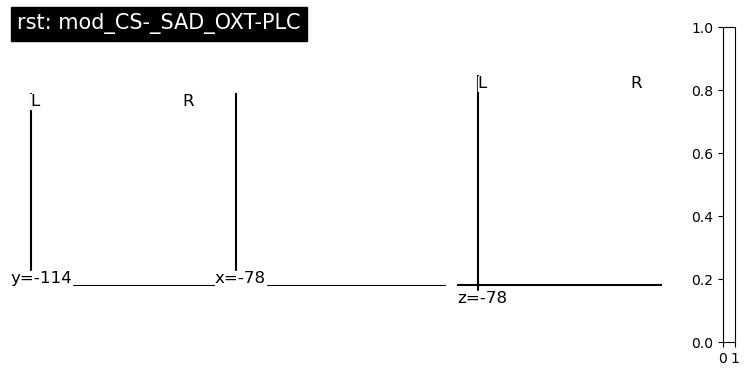

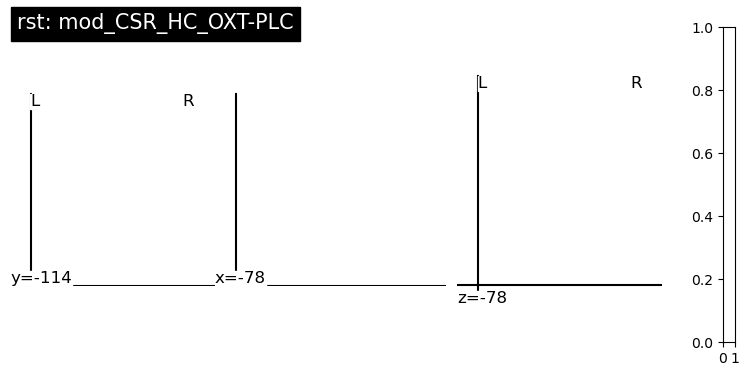

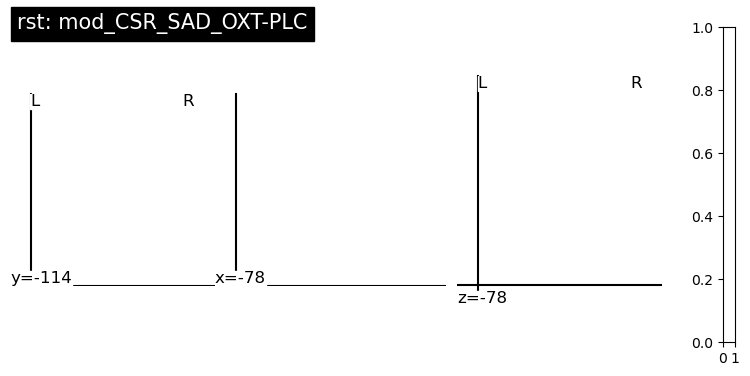

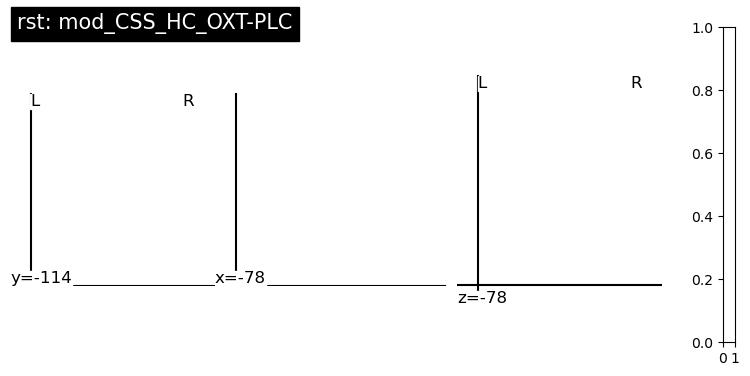

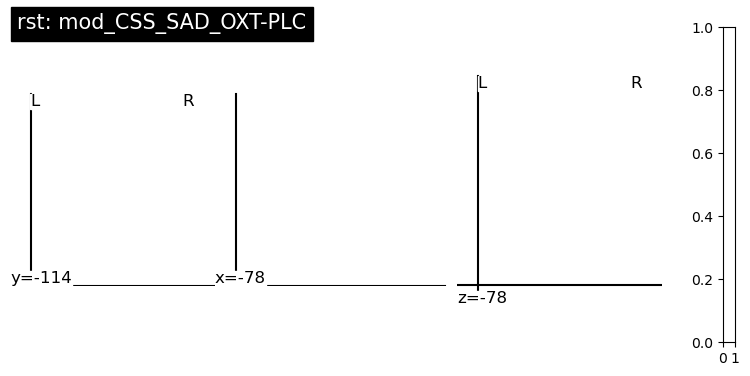

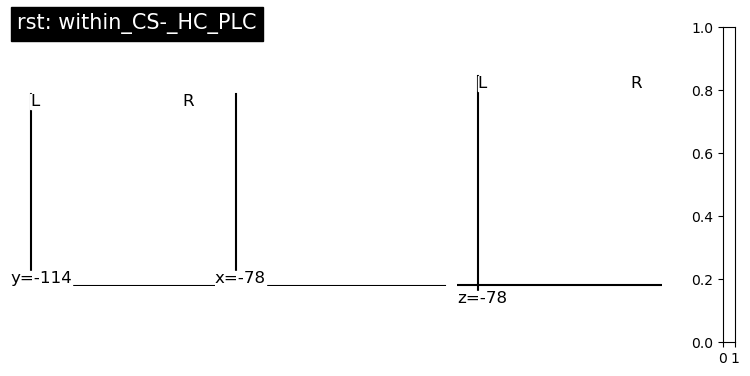

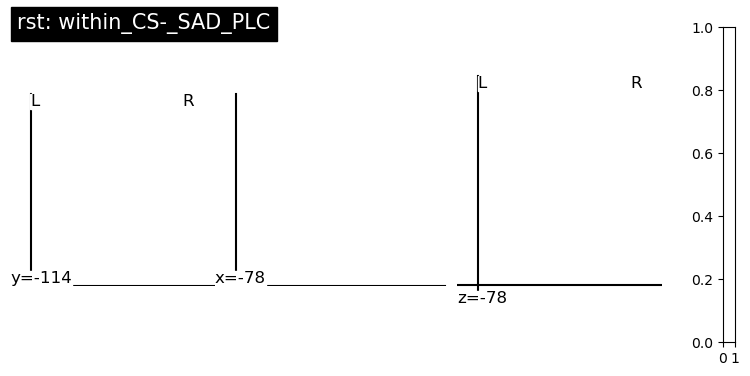

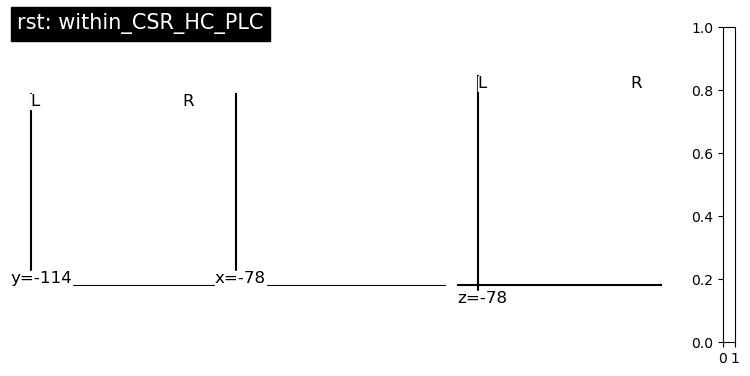

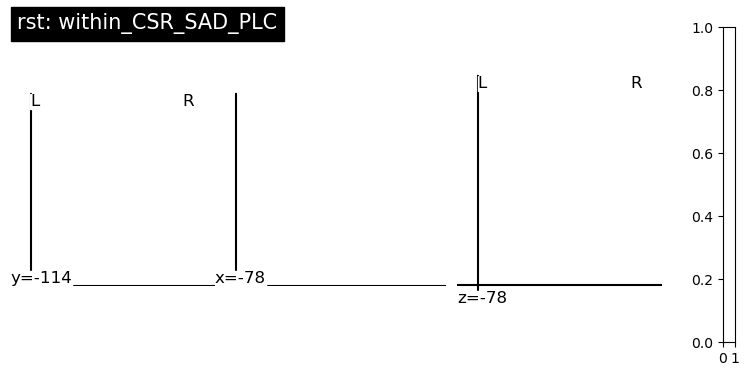

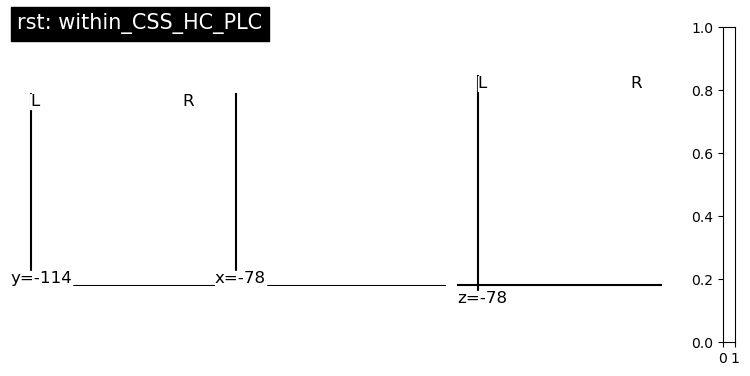

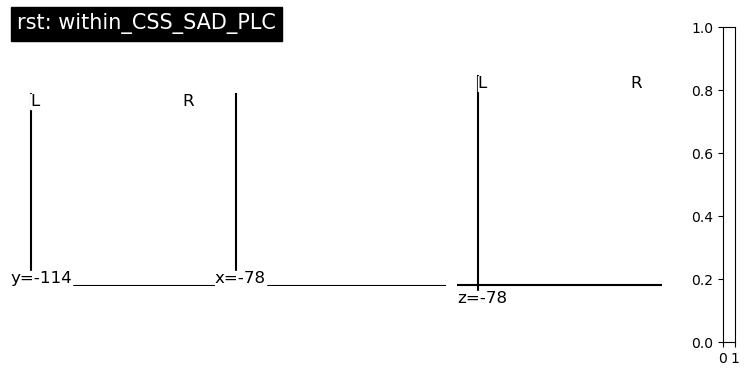

In [3]:
for key in ['ext', 'rst']:
    folder = DIRS[key]
    if not folder.exists():
        continue
    print(f"\n=== {key.upper()} ===")
    q_files = list_files(folder, '*_q.nii.gz')
    print(f"q maps: {len(q_files)}")
    for q_path in q_files:
        base = q_path.name.replace('_q.nii.gz', '')
        effect_path = None
        for suffix in ['_diff.nii.gz', '_mean.nii.gz']:
            candidate = folder / f"{base}{suffix}"
            if candidate.exists():
                effect_path = candidate
                break
        if effect_path is None:
            continue
        plot_effect_with_q(effect_path, q_path, title=f"{key}: {base}")

    sig_csvs = list_files(folder, '*_sig.csv')
    for csv_path in sig_csvs:
        print(f"\n{csv_path.name}")
        show_csv(csv_path, n=10)

plotting.show()


## Dynamic (EXT/RST): Significant Summary + Top Voxels



=== DYN_EXT ===

Dynamic summary contrasts


,Pair,Metric,Contrast,N_sig_vox
0,CS-_vs_CSS,delta,SAD PLC (mean>0),151350
1,CS-_vs_CSS,delta,HC PLC (mean>0),151350
2,CS-_vs_CSS,delta,SAD-HC PLC,151350
3,CS-_vs_CSS,delta,SAD OXT-PLC,151350
4,CS-_vs_CSS,delta,HC OXT-PLC,151350
5,CS-_vs_CSS,slope,SAD PLC (mean>0),151352
6,CS-_vs_CSS,slope,HC PLC (mean>0),151350
7,CS-_vs_CSS,slope,SAD-HC PLC,151350
8,CS-_vs_CSS,slope,SAD OXT-PLC,151350
9,CS-_vs_CSS,slope,HC OXT-PLC,151350


Rows: 30

Dynamic significant voxels


,Contrast,Pair,Metric,x,y,z,p,q,Name,LabelID,Atlas
0,CS-_vs_CSS_SAD_PLC_slope,CS-_vs_CSS,slope,9.0,45.0,3.0,0.046191,0.046191,370\t17Networks_RH_DefaultA_PFCm_3\t249\t255\t...,370,Schaefer
1,CS-_vs_CSS_SAD_PLC_slope,CS-_vs_CSS,slope,9.0,48.0,3.0,0.048390,0.048390,370\t17Networks_RH_DefaultA_PFCm_3\t249\t255\t...,370,Schaefer
2,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,36.0,3.0,33.0,0.041792,0.041792,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer
3,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,36.0,3.0,36.0,0.040992,0.040992,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer
4,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,36.0,3.0,39.0,0.037193,0.037193,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer
5,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,39.0,0.0,33.0,0.041992,0.041992,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer
6,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,39.0,0.0,36.0,0.040992,0.040992,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer
7,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,39.0,3.0,36.0,0.041992,0.041992,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer
8,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,39.0,3.0,39.0,0.041792,0.041792,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer
9,CS-_vs_CSR_SAD_PLC_delta,CS-_vs_CSR,delta,39.0,3.0,42.0,0.043191,0.043191,334\t17Networks_RH_ContA_PFCl_5\t233\t148\t38\t0,334,Schaefer


Rows: 347


/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: empty mask
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
/Users/xiaoqianxiao/fsl/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize, facecolor=facecolor)



=== DYN_RST ===

Dynamic summary contrasts


,Pair,Metric,Contrast,N_sig_vox
0,CS-_vs_CSS,delta,SAD PLC (mean>0),151350
1,CS-_vs_CSS,delta,HC PLC (mean>0),151516
2,CS-_vs_CSS,delta,SAD-HC PLC,151350
3,CS-_vs_CSS,delta,SAD OXT-PLC,151350
4,CS-_vs_CSS,delta,HC OXT-PLC,151357
5,CS-_vs_CSS,slope,SAD PLC (mean>0),151350
6,CS-_vs_CSS,slope,HC PLC (mean>0),162942
7,CS-_vs_CSS,slope,SAD-HC PLC,151350
8,CS-_vs_CSS,slope,SAD OXT-PLC,151350
9,CS-_vs_CSS,slope,HC OXT-PLC,151350


Rows: 30

Dynamic significant voxels


,Contrast,Pair,Metric,x,y,z,p,q,Name,LabelID,Atlas
0,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-60.0,-57.0,12.0,0.044191,0.044191,199\t17Networks_LH_TempPar_5\t9\t41\t252\t0,199,Schaefer
1,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-60.0,-54.0,9.0,0.039192,0.039192,199\t17Networks_LH_TempPar_5\t9\t41\t252\t0,199,Schaefer
2,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-60.0,-51.0,6.0,0.043191,0.043191,199\t17Networks_LH_TempPar_5\t9\t41\t252\t0,199,Schaefer
3,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-57.0,-69.0,15.0,0.037193,0.037193,64\t17Networks_LH_DorsAttnA_ParOcc_1\t74\t155\...,64,Schaefer
4,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-57.0,-66.0,12.0,0.048590,0.048590,121\t17Networks_LH_ContA_Temp_1\t230\t148\t35\t0,121,Schaefer
5,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-57.0,-66.0,15.0,0.032593,0.032593,64\t17Networks_LH_DorsAttnA_ParOcc_1\t74\t155\...,64,Schaefer
6,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-57.0,-57.0,9.0,0.039192,0.039192,199\t17Networks_LH_TempPar_5\t9\t41\t252\t0,199,Schaefer
7,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-57.0,-57.0,12.0,0.045191,0.045191,199\t17Networks_LH_TempPar_5\t9\t41\t252\t0,199,Schaefer
8,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-57.0,-54.0,6.0,0.037193,0.037193,199\t17Networks_LH_TempPar_5\t9\t41\t252\t0,199,Schaefer
9,CS-_vs_CSS_HC_PLC_delta,CS-_vs_CSS,delta,-57.0,-54.0,9.0,0.034593,0.034593,199\t17Networks_LH_TempPar_5\t9\t41\t252\t0,199,Schaefer


Rows: 17930


/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: empty mask
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)


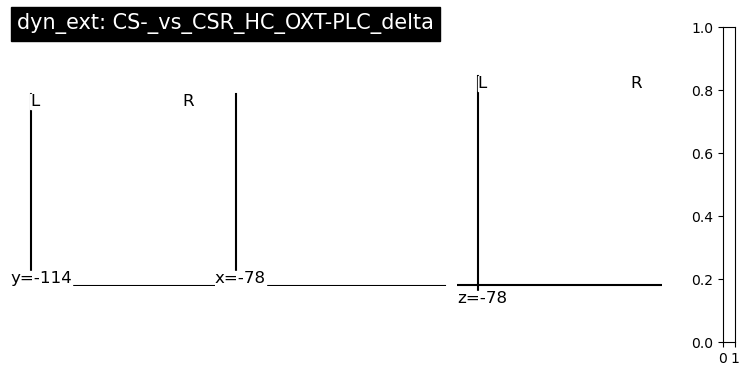

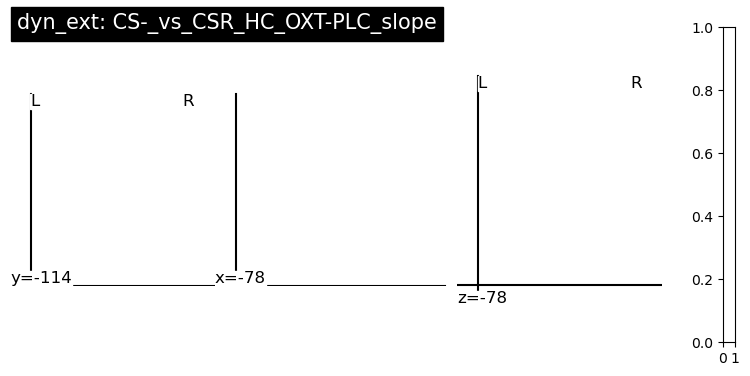

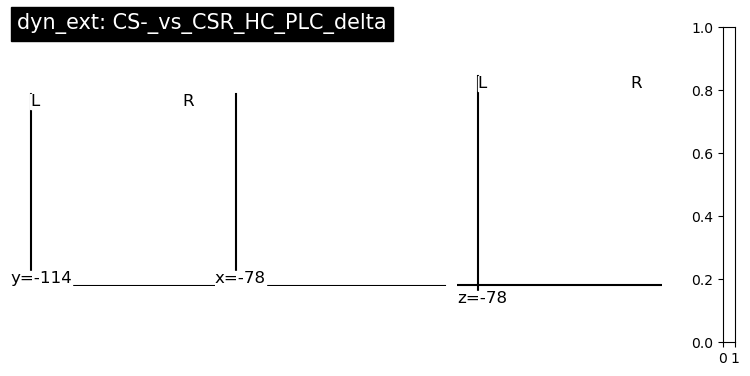

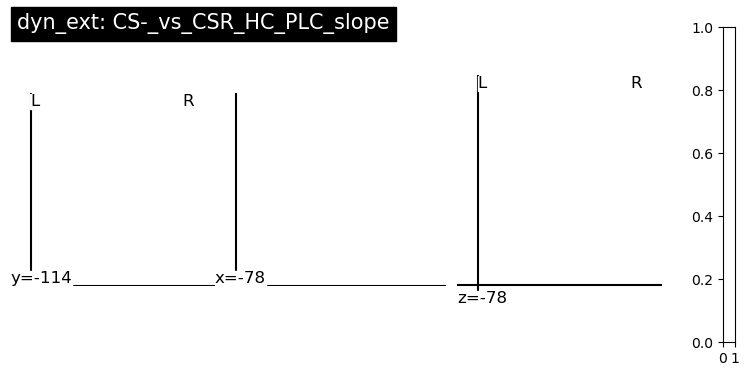

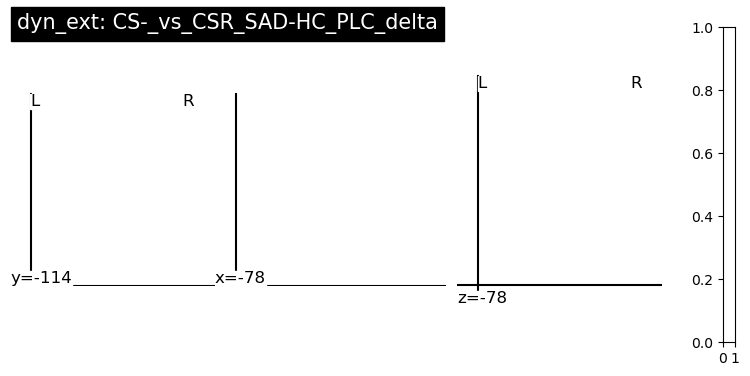

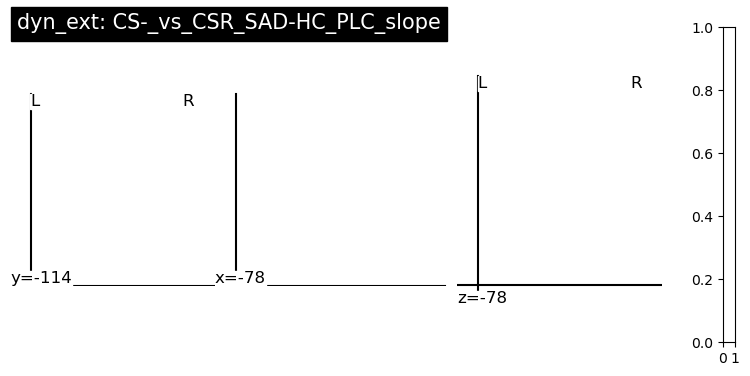

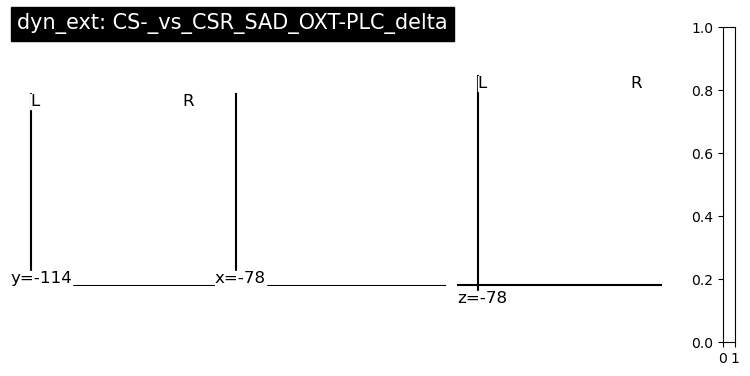

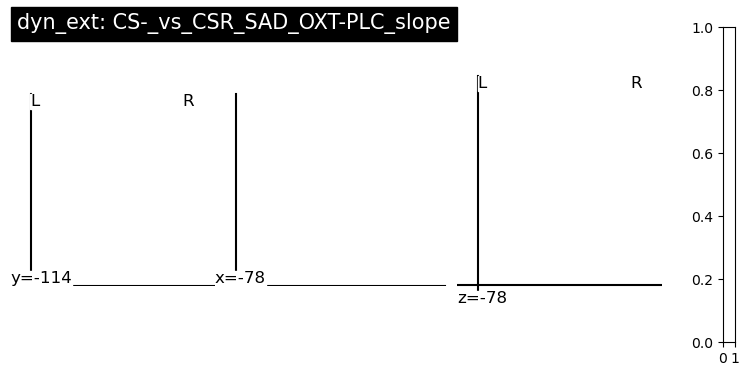

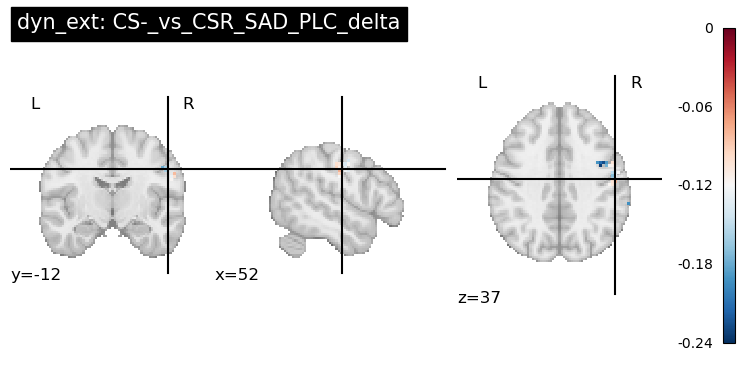

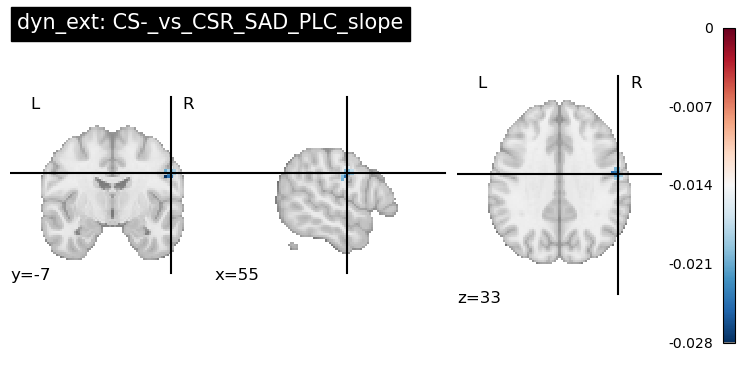

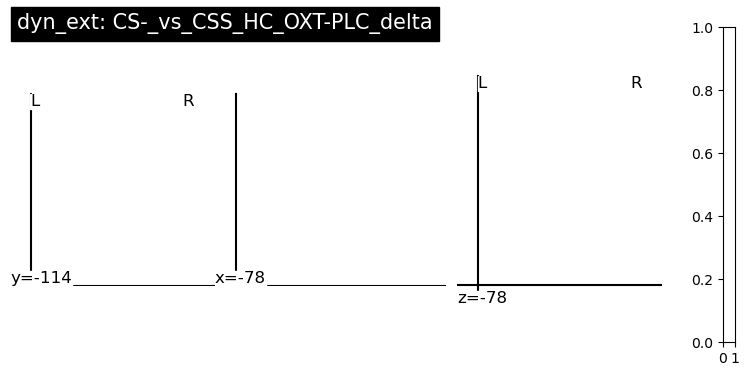

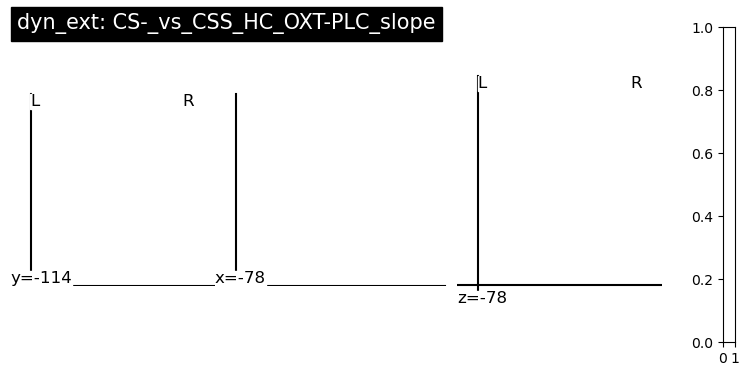

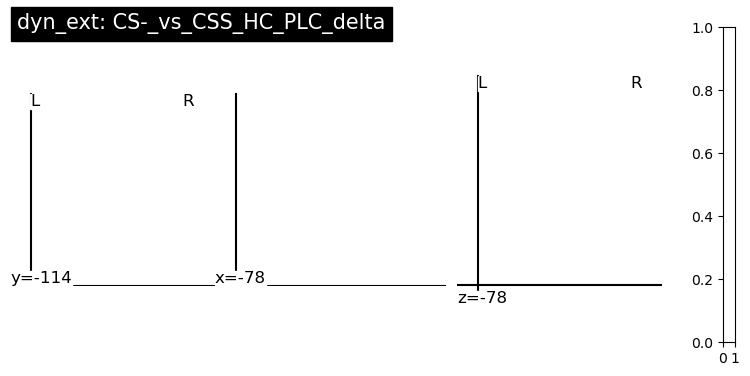

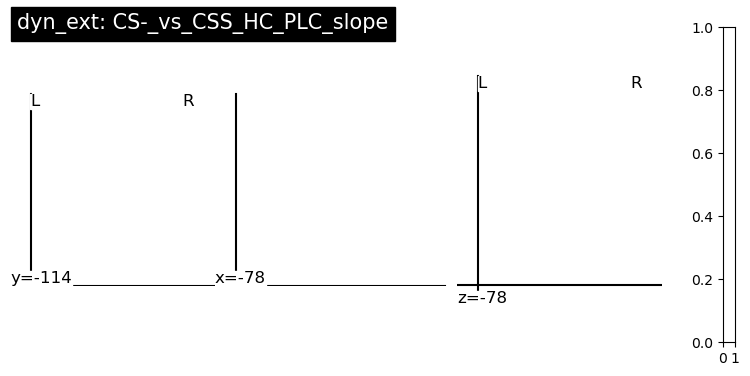

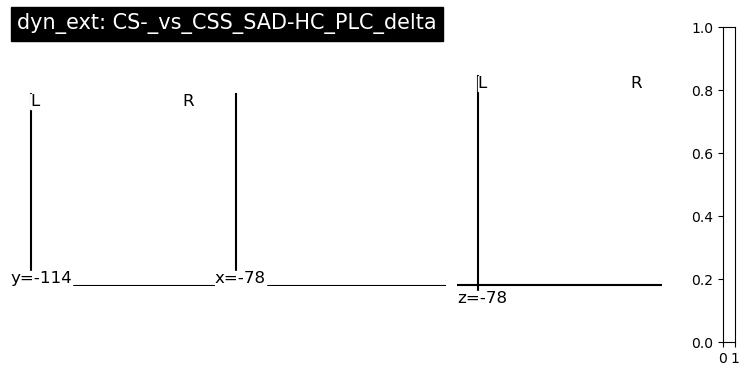

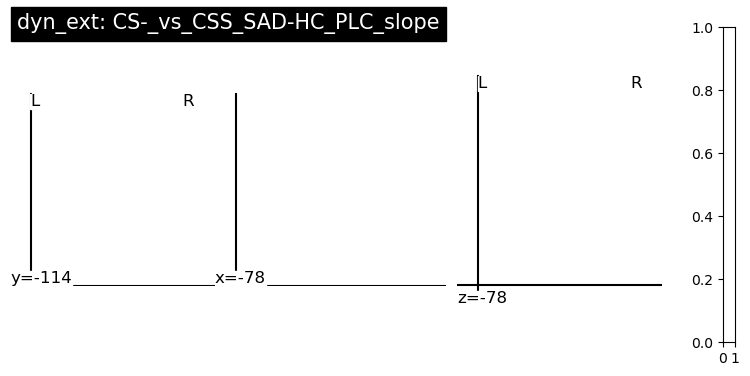

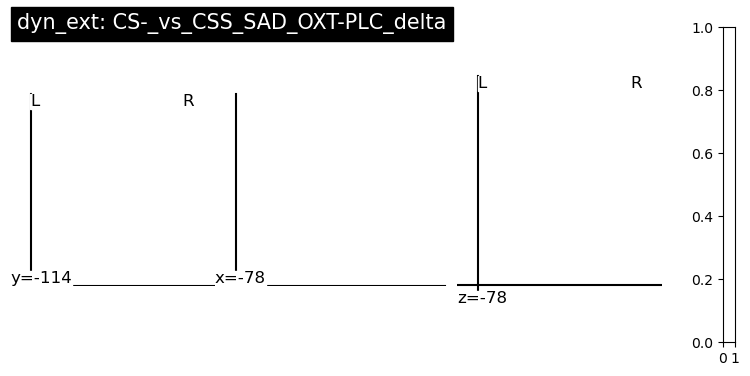

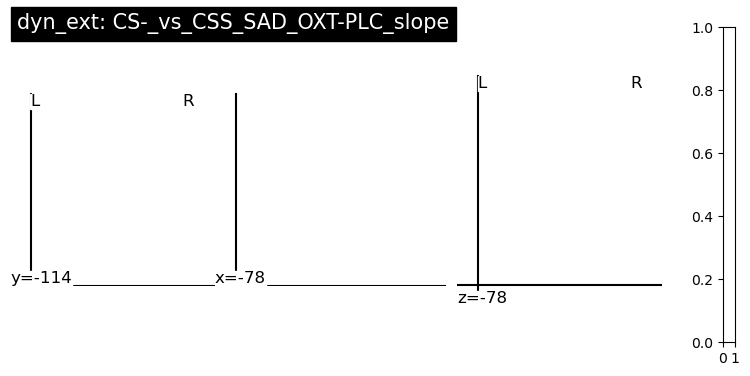

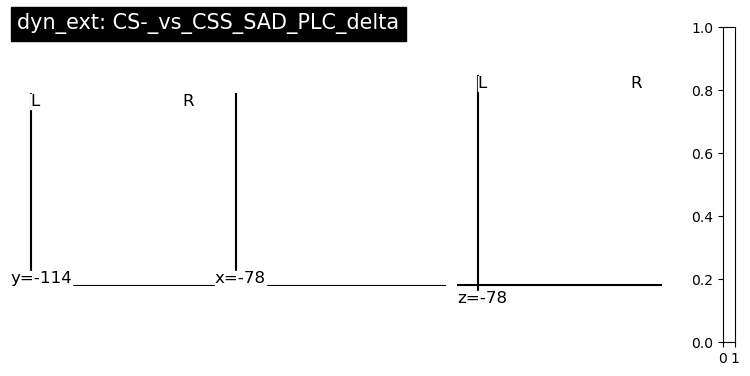

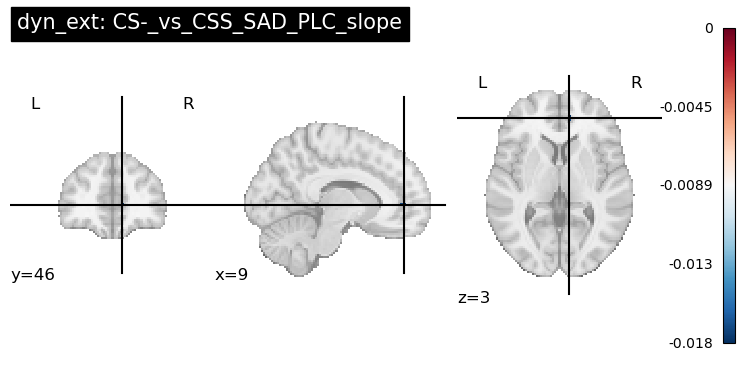

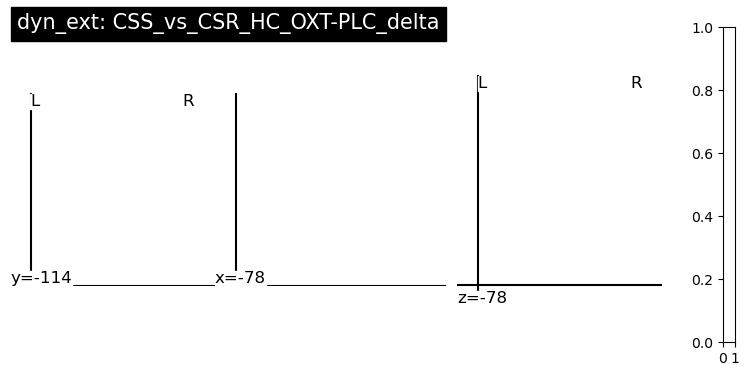

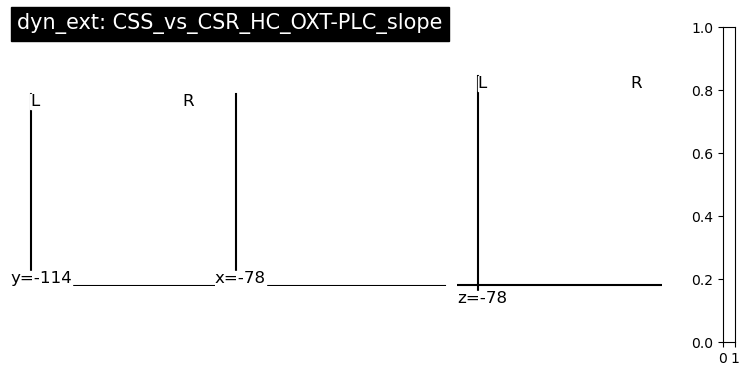

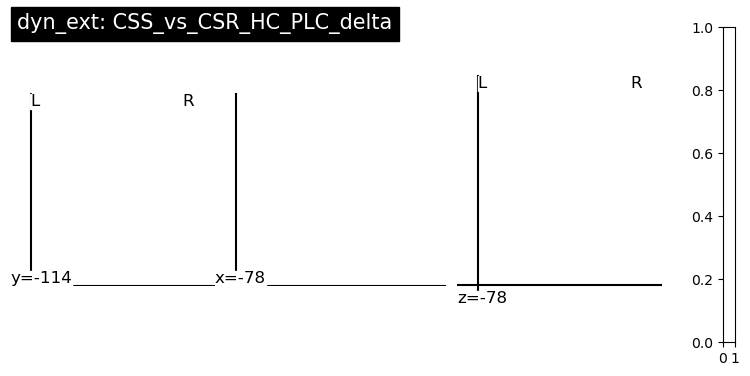

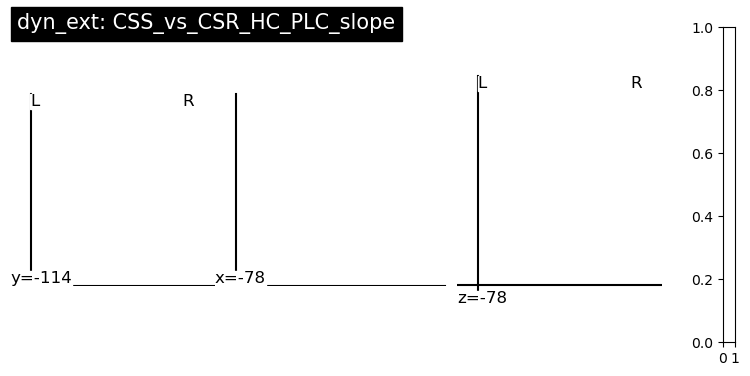

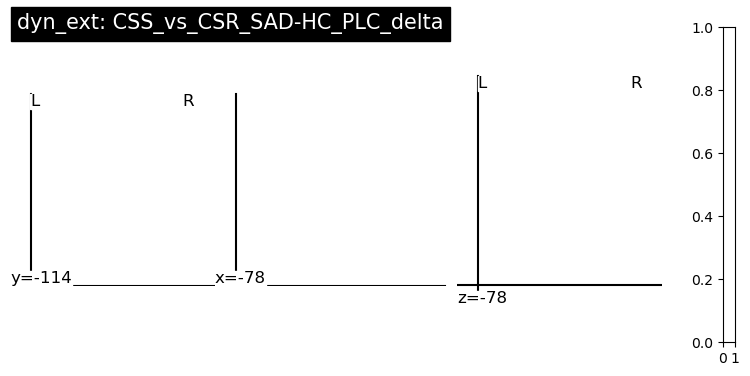

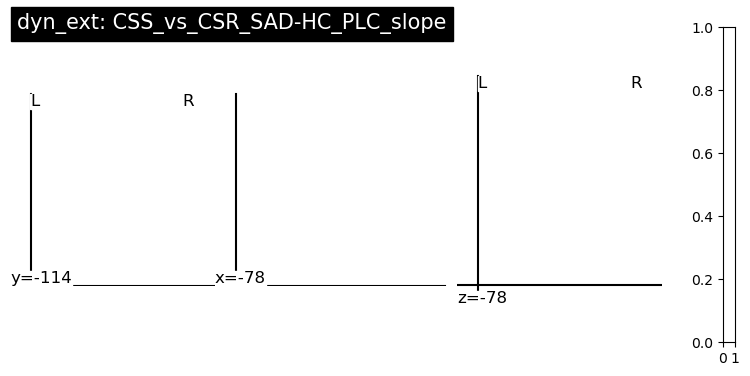

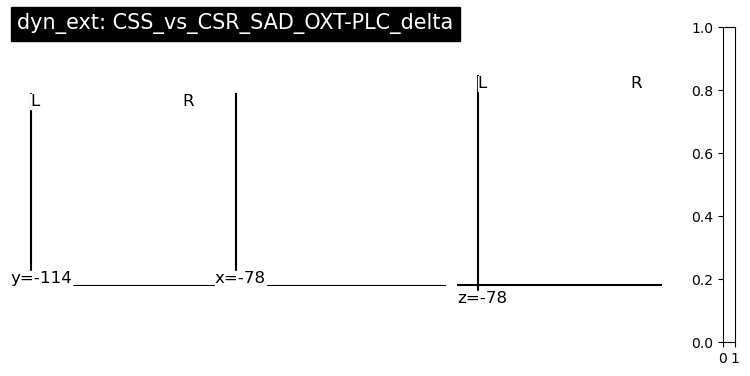

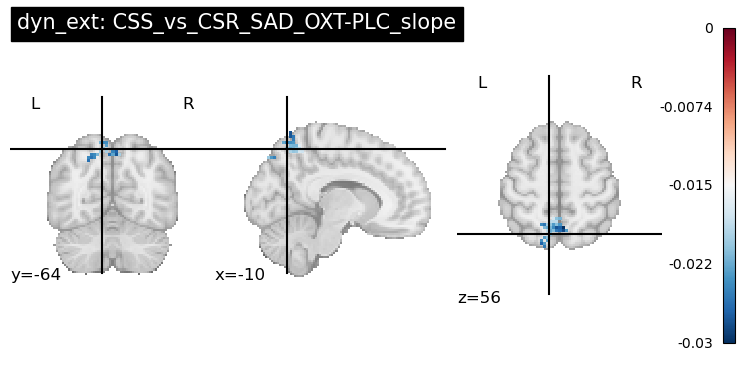

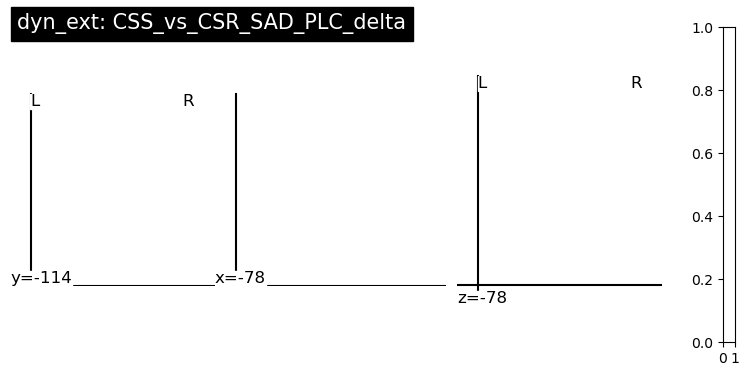

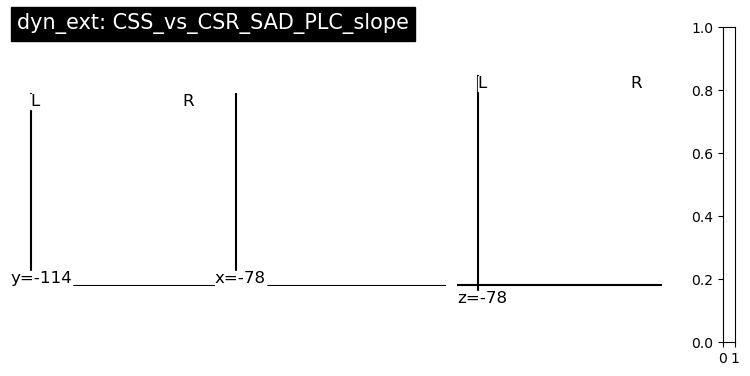

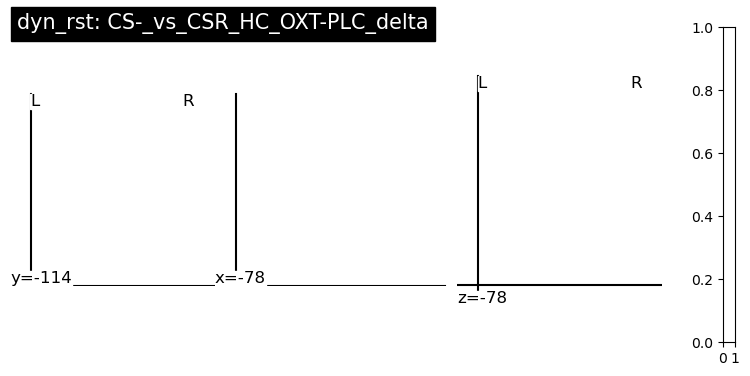

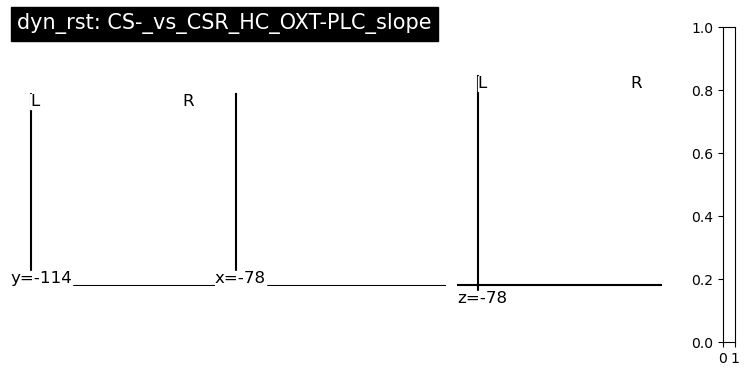

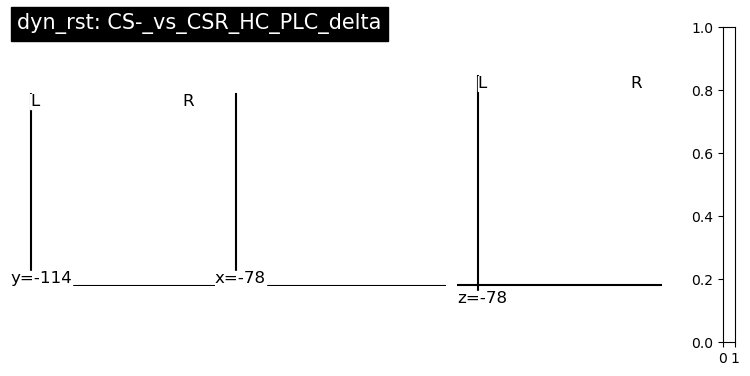

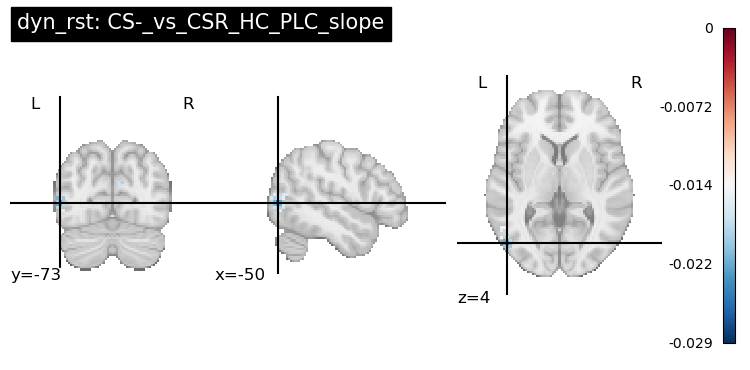

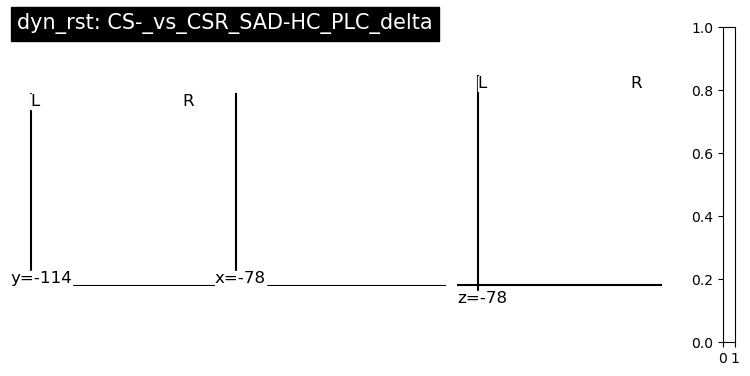

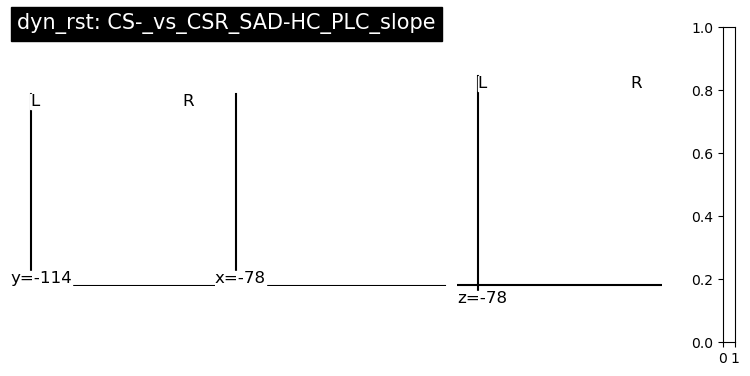

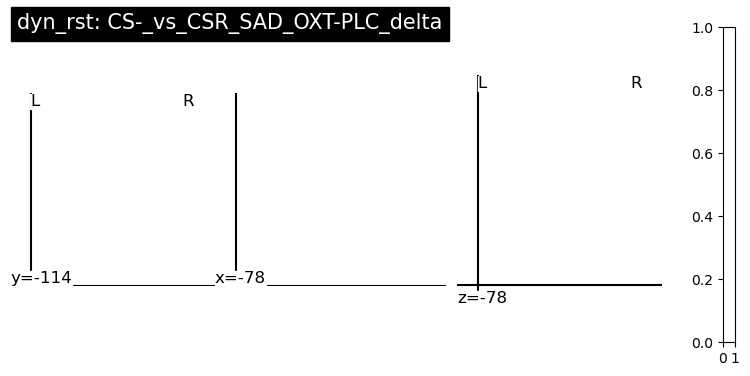

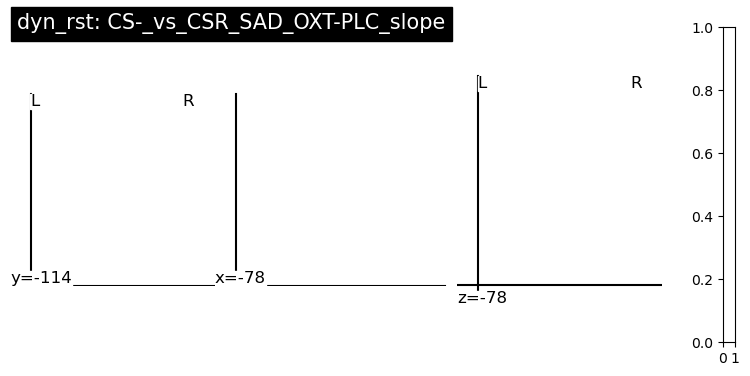

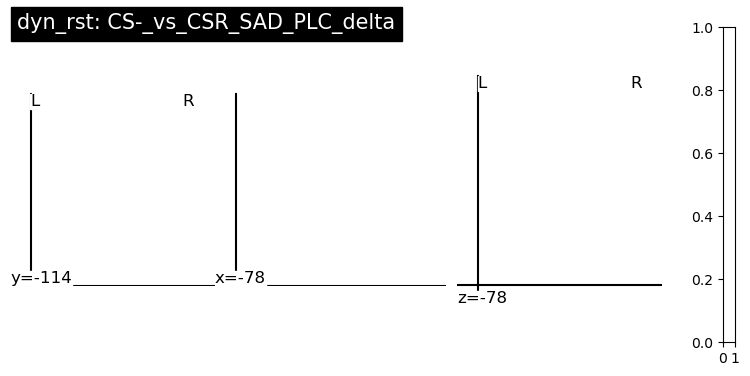

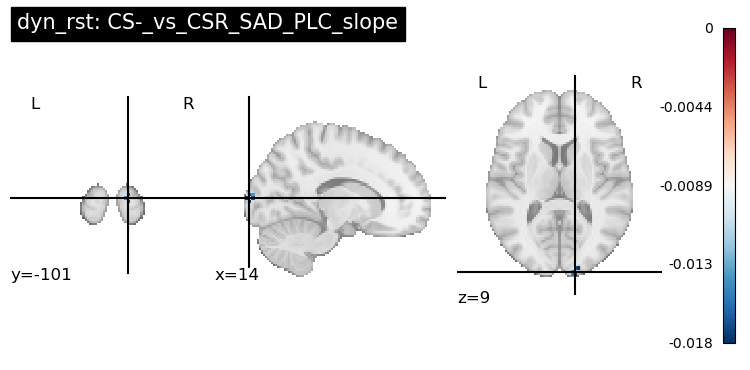

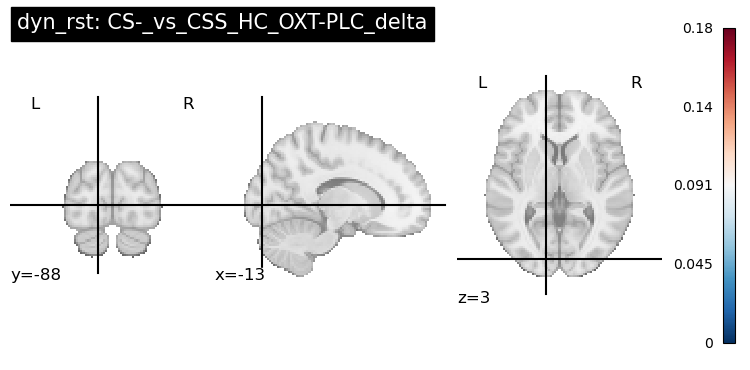

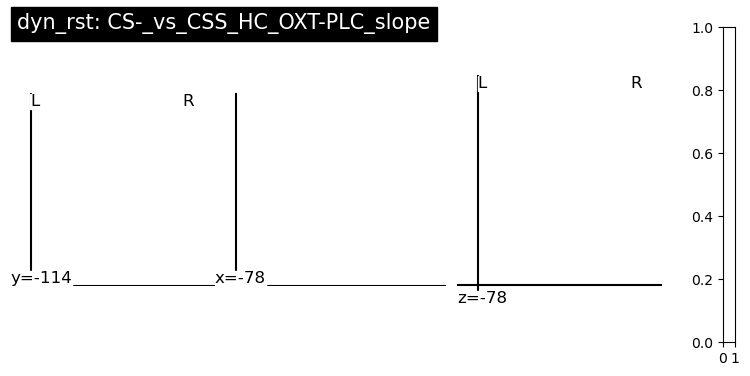

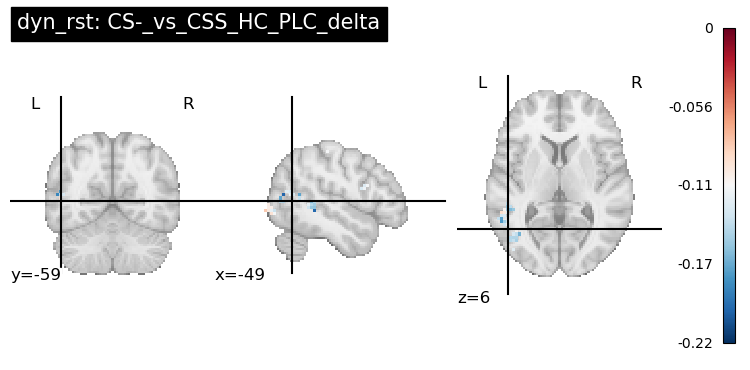

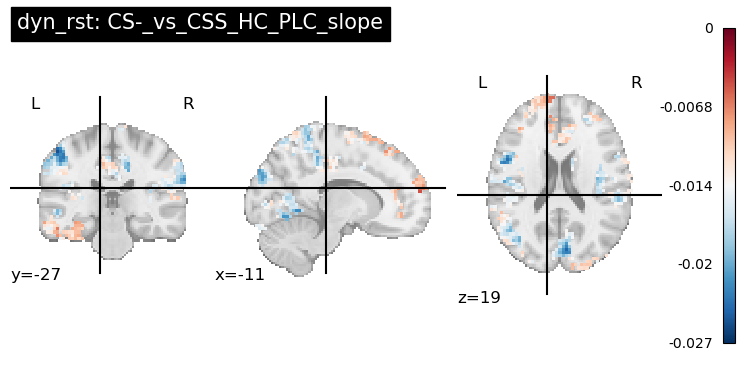

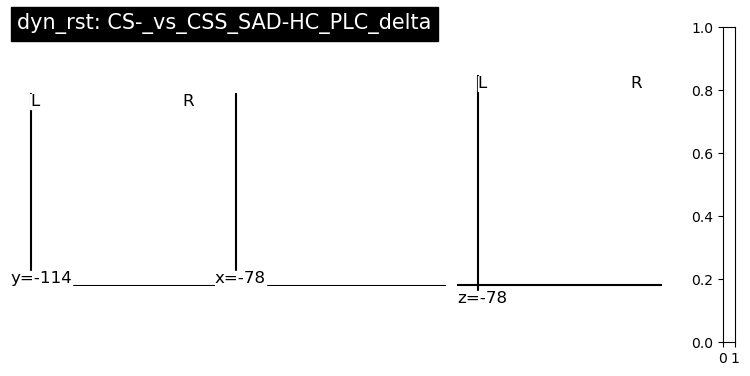

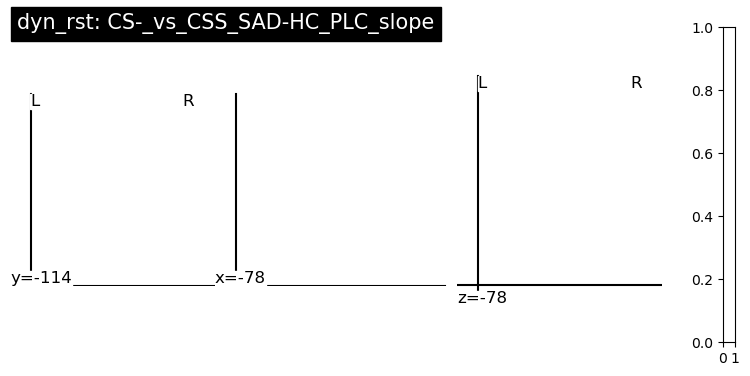

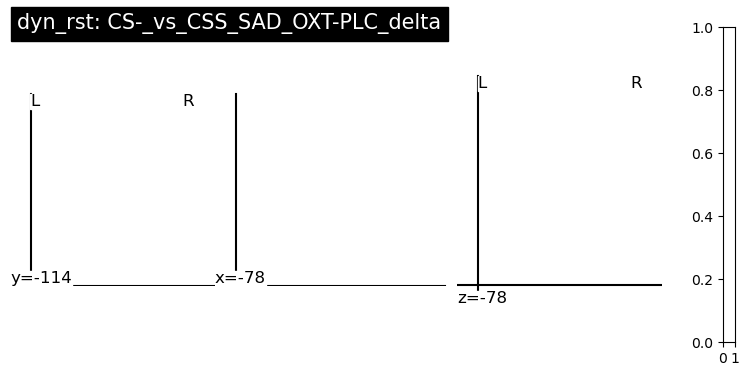

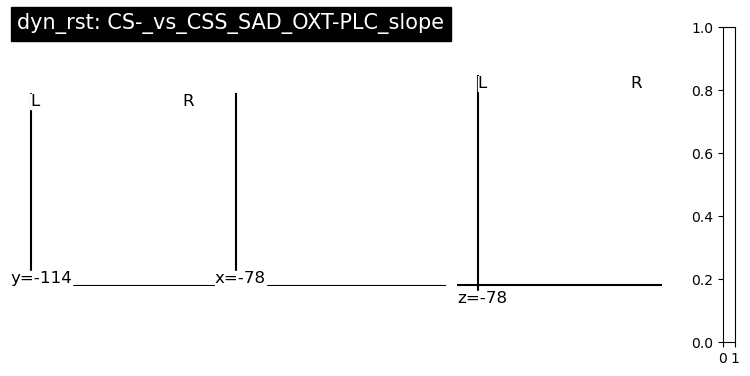

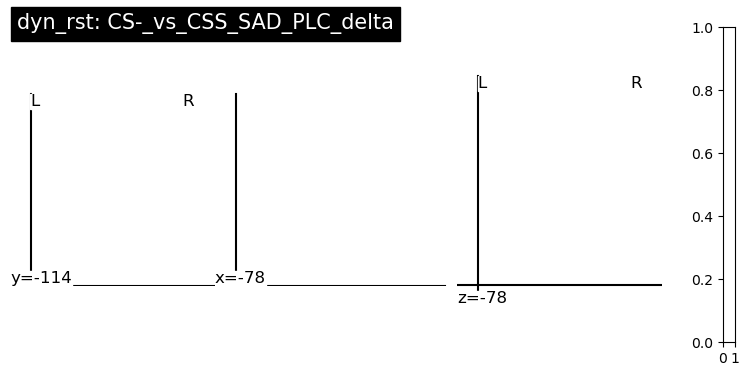

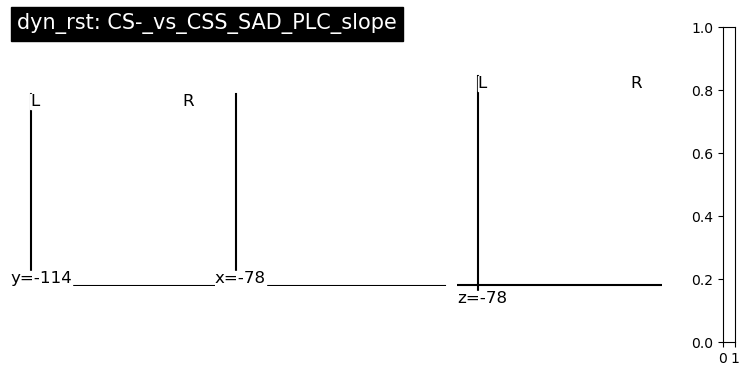

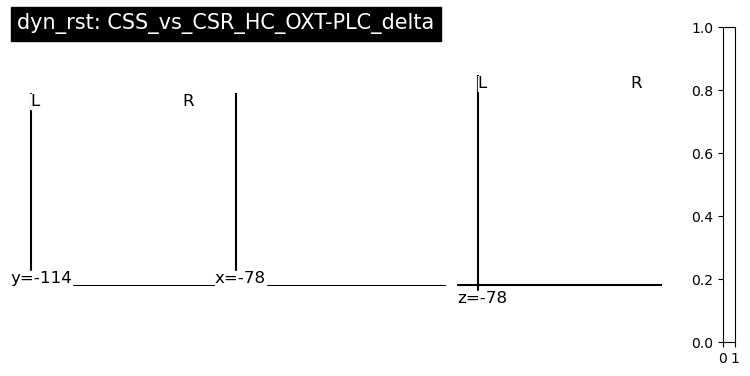

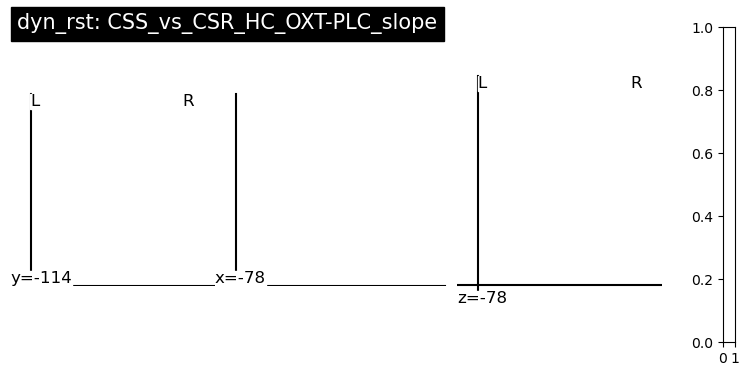

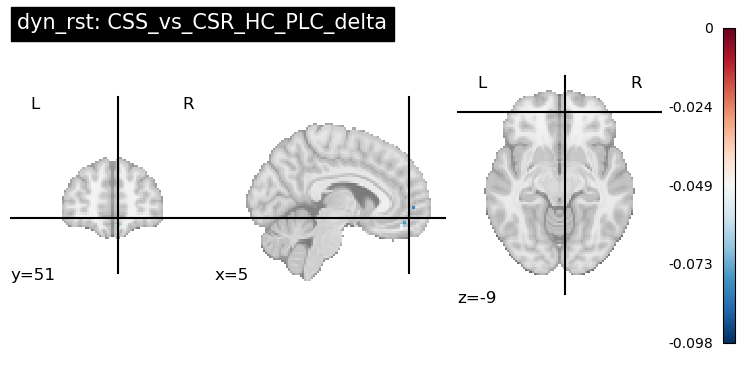

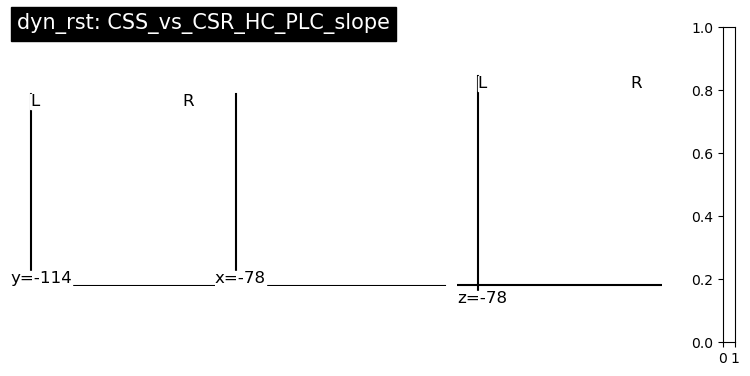

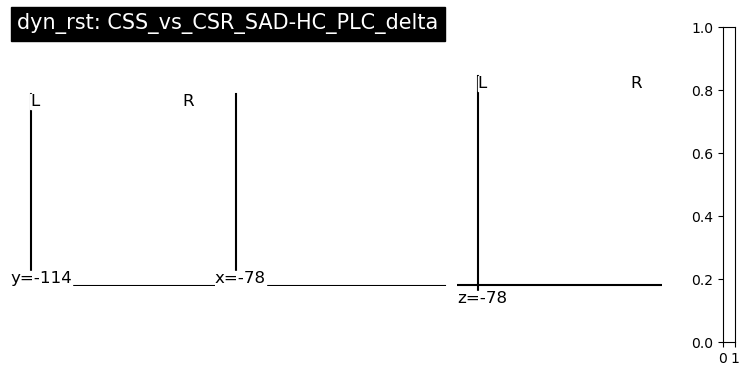

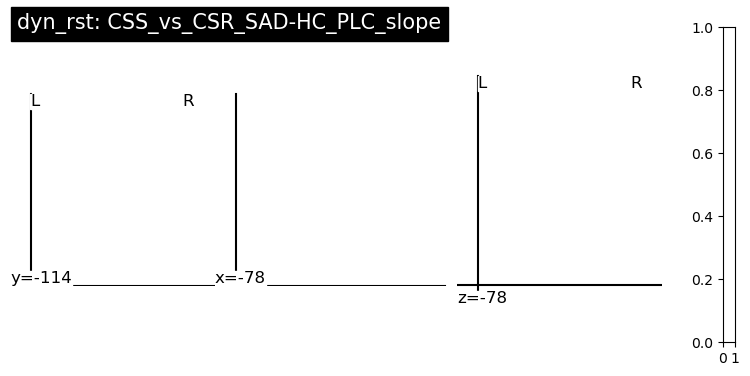

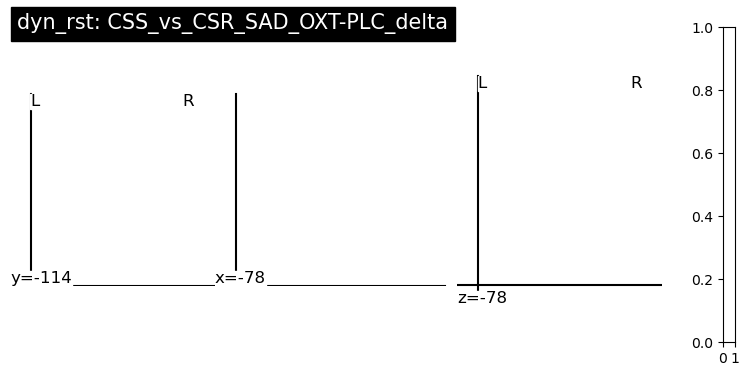

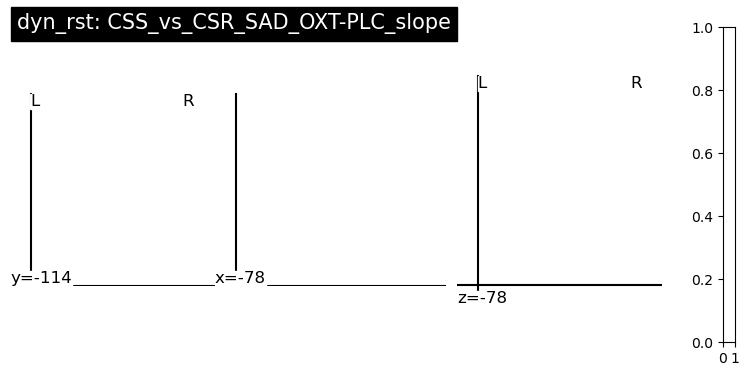

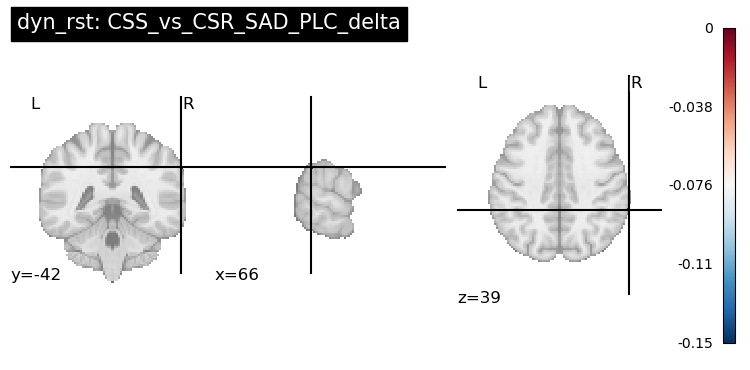

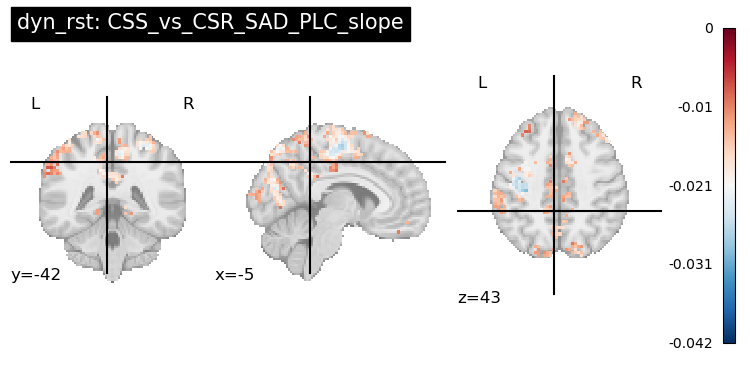

In [4]:
for key in ['dyn_ext', 'dyn_rst']:
    folder = DIRS[key]
    if not folder.exists():
        continue
    print(f"\n=== {key.upper()} ===")

    summary_path = folder / 'dynamic_summary_contrasts.csv'
    if summary_path.exists():
        print("\nDynamic summary contrasts")
        show_csv(summary_path, n=10)

    sig_path = folder / 'dynamic_sig_merged.csv'
    if sig_path.exists():
        print("\nDynamic significant voxels")
        df = pd.read_csv(sig_path)
        display(df.head(10))
        print(f"Rows: {len(df)}")

    q_files = list_files(folder, '*_q.nii.gz')
    for q_path in q_files:
        base = q_path.name.replace('_q.nii.gz', '')
        effect_path = None
        for suffix in ['_diff.nii.gz', '_mean.nii.gz']:
            candidate = folder / f"{base}{suffix}"
            if candidate.exists():
                effect_path = candidate
                break
        if effect_path is None:
            continue
        plot_effect_with_q(effect_path, q_path, title=f"{key}: {base}")

plotting.show()


## Cross-phase: Significant Summary + Top Voxels



Cross-phase summary contrasts


,Condition,Contrast,N_sig_vox
0,CS-,SAD PLC (mean>0),151631
1,CS-,HC PLC (mean>0),152044
2,CS-,SAD-HC PLC,151350
3,CS-,SAD OXT-PLC,151350
4,CS-,HC OXT-PLC,151350
5,CSS,SAD PLC (mean>0),151835
6,CSS,HC PLC (mean>0),152614
7,CSS,SAD-HC PLC,151350
8,CSS,SAD OXT-PLC,151350
9,CSS,HC OXT-PLC,151350


Rows: 15

Cross-phase significant voxels


,Contrast,Condition,x,y,z,p,q,Name,LabelID,Atlas
0,crossphase_CS-_SAD_PLC,CS-,-24.0,-96.0,24.0,0.015597,0.015597,11\t17Networks_LH_VisCent_ExStr_10\t120\t18\t1...,11,Schaefer
1,crossphase_CS-_SAD_PLC,CS-,-24.0,-93.0,24.0,0.028994,0.028994,12\t17Networks_LH_VisCent_ExStr_11\t120\t19\t1...,12,Schaefer
2,crossphase_CS-_SAD_PLC,CS-,-24.0,-93.0,27.0,0.021396,0.021396,23\t17Networks_LH_VisPeri_ExStrSup_4\t255\t2\t...,23,Schaefer
3,crossphase_CS-_SAD_PLC,CS-,-24.0,-90.0,21.0,0.049190,0.049190,12\t17Networks_LH_VisCent_ExStr_11\t120\t19\t1...,12,Schaefer
4,crossphase_CS-_SAD_PLC,CS-,-24.0,-90.0,24.0,0.049190,0.049190,12\t17Networks_LH_VisCent_ExStr_11\t120\t19\t1...,12,Schaefer
5,crossphase_CS-_SAD_PLC,CS-,-21.0,-99.0,24.0,0.038792,0.038792,11\t17Networks_LH_VisCent_ExStr_10\t120\t18\t1...,11,Schaefer
6,crossphase_CS-_SAD_PLC,CS-,-21.0,-96.0,21.0,0.028994,0.028994,11\t17Networks_LH_VisCent_ExStr_10\t120\t18\t1...,11,Schaefer
7,crossphase_CS-_SAD_PLC,CS-,-21.0,-96.0,24.0,0.002599,0.002599,11\t17Networks_LH_VisCent_ExStr_10\t120\t18\t1...,11,Schaefer
8,crossphase_CS-_SAD_PLC,CS-,-21.0,-93.0,18.0,0.028994,0.028994,11\t17Networks_LH_VisCent_ExStr_10\t120\t18\t1...,11,Schaefer
9,crossphase_CS-_SAD_PLC,CS-,-21.0,-93.0,21.0,0.018596,0.018596,11\t17Networks_LH_VisCent_ExStr_10\t120\t18\t1...,11,Schaefer


Rows: 5153


/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)
/var/folders/63/3j_hstl96w58qx1sdw9czhxr0000gn/T/ipykernel_27673/2099250652.py:30: UserWarning: empty mask
  display = plotting.plot_stat_map(out_img, title=title, display_mode='ortho', threshold=0, cmap=cmap)


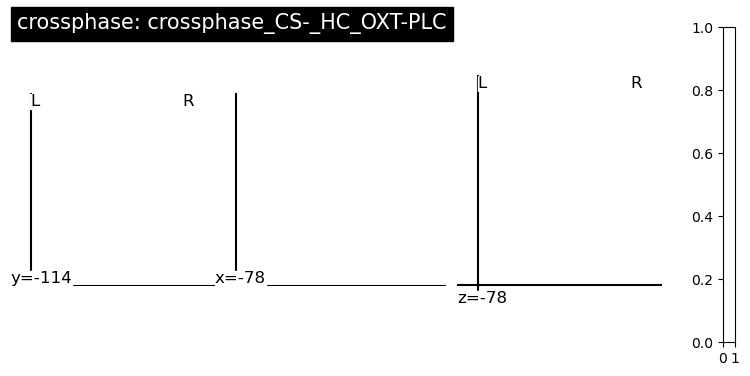

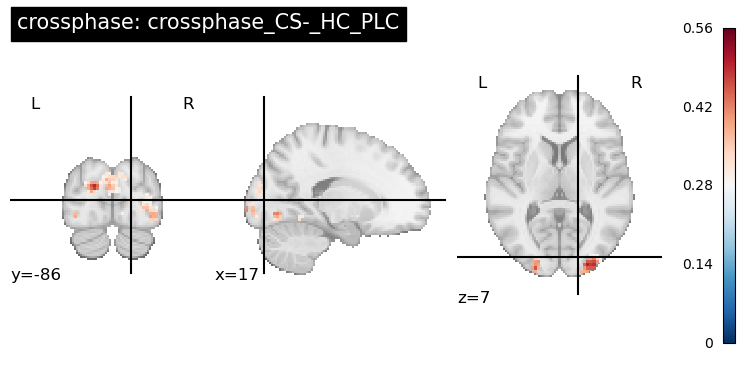

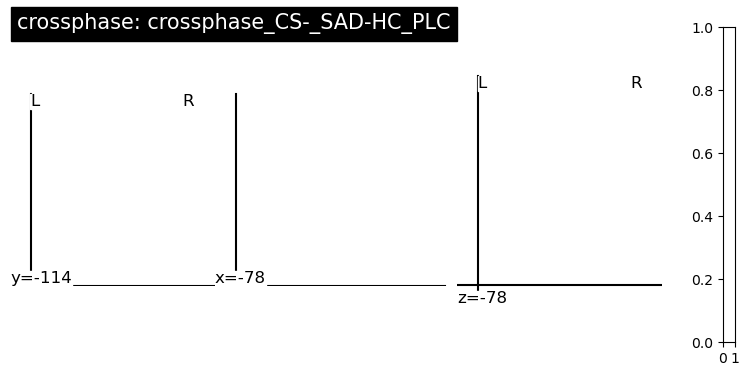

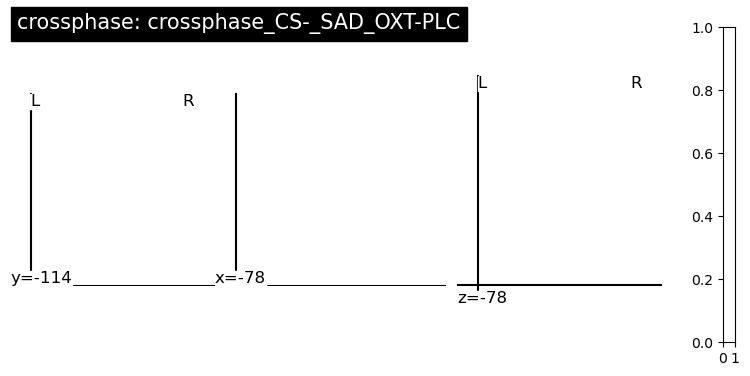

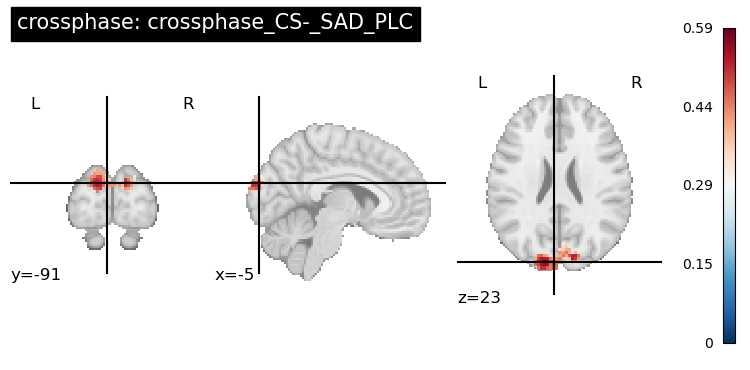

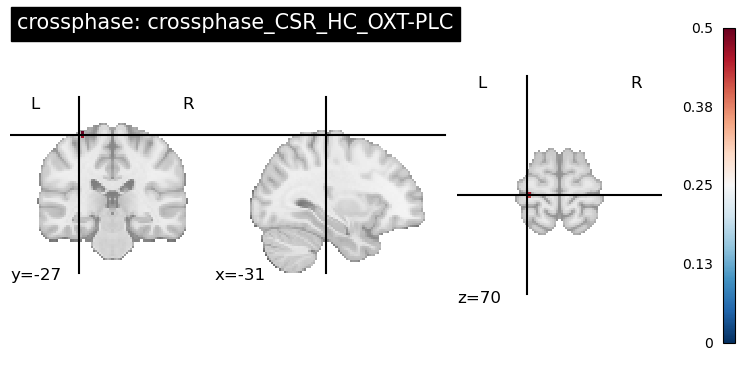

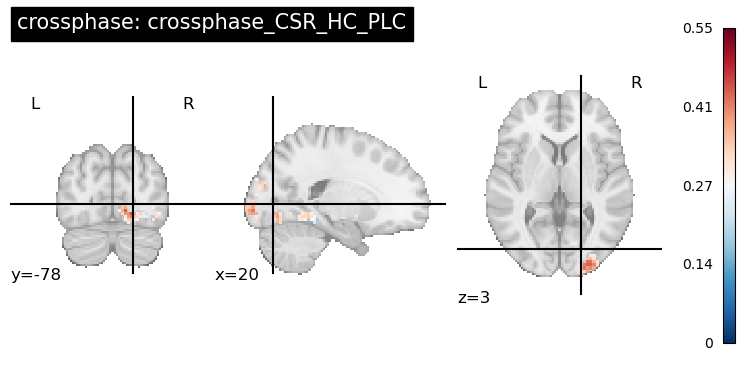

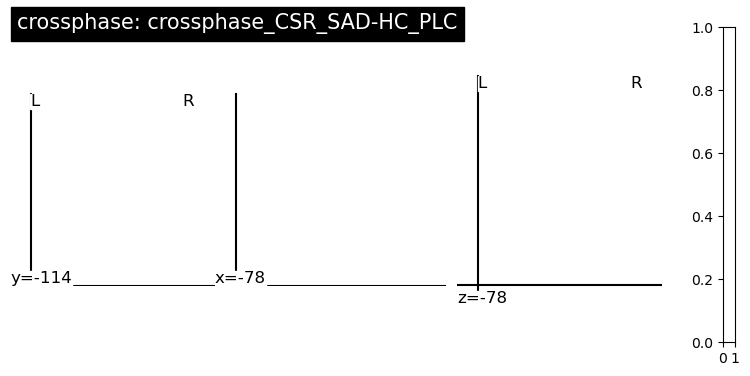

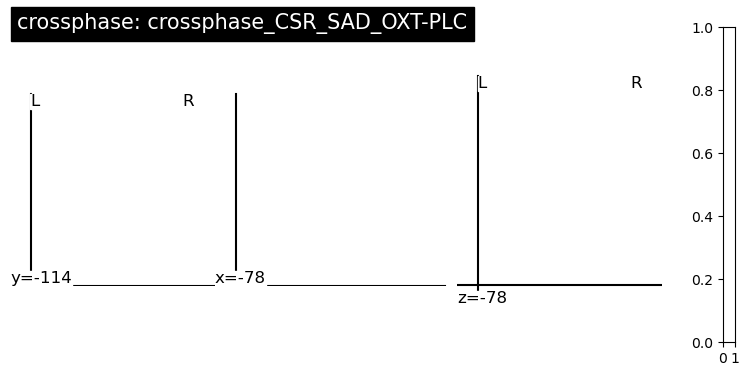

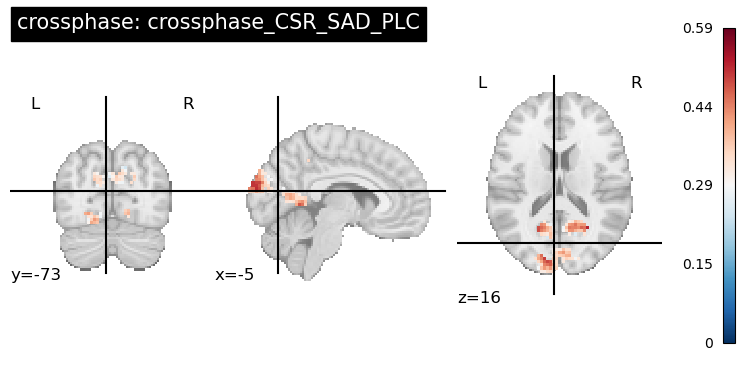

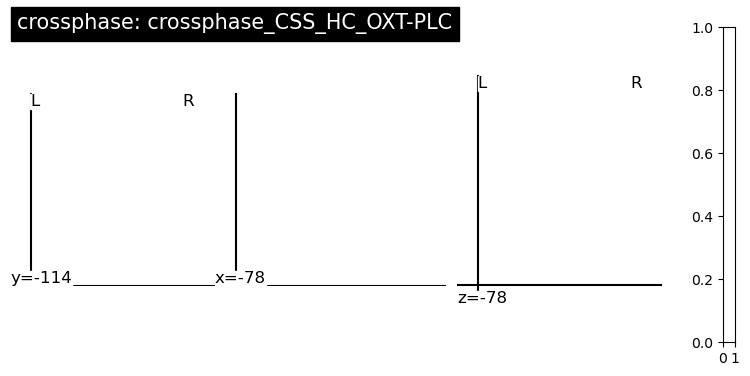

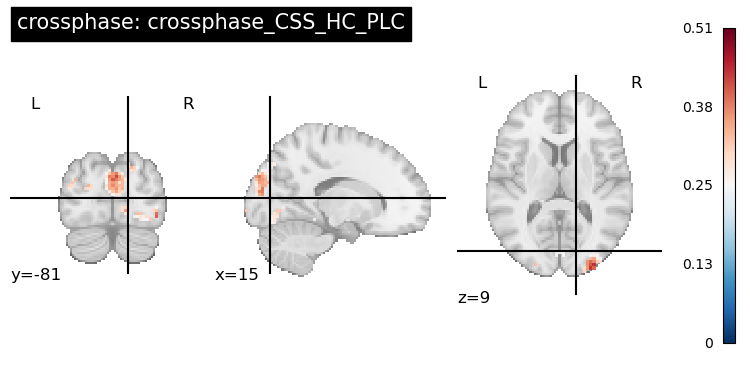

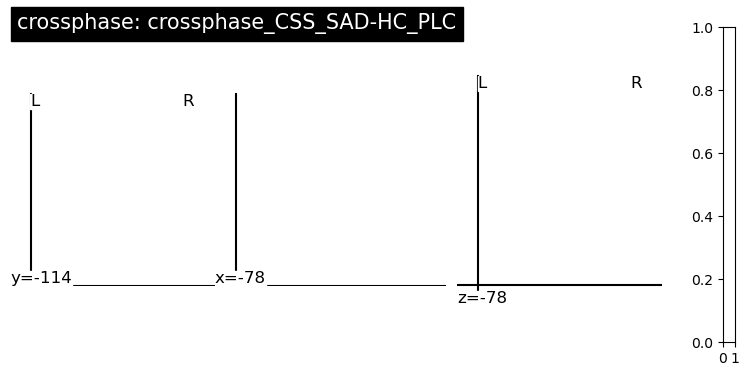

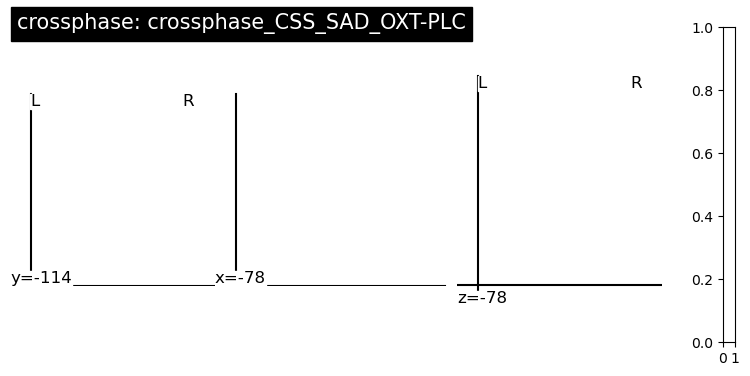

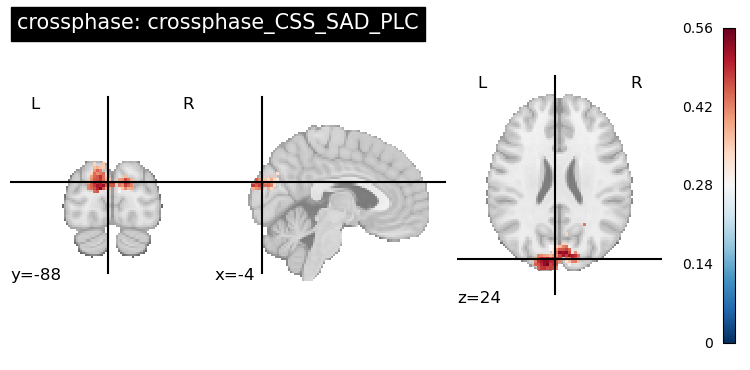

In [5]:
folder = DIRS['crossphase']
if folder.exists():
    summary_path = folder / 'crossphase_summary_contrasts.csv'
    if summary_path.exists():
        print("\nCross-phase summary contrasts")
        show_csv(summary_path, n=10)

    sig_path = folder / 'crossphase_sig_merged.csv'
    if sig_path.exists():
        print("\nCross-phase significant voxels")
        df = pd.read_csv(sig_path)
        display(df.head(10))
        print(f"Rows: {len(df)}")

    q_files = list_files(folder, '*_q.nii.gz')
    for q_path in q_files:
        base = q_path.name.replace('_q.nii.gz', '')
        effect_path = None
        for suffix in ['_diff.nii.gz', '_mean.nii.gz']:
            candidate = folder / f"{base}{suffix}"
            if candidate.exists():
                effect_path = candidate
                break
        if effect_path is None:
            continue
        plot_effect_with_q(effect_path, q_path, title=f"crossphase: {base}")

plotting.show()


## Optional: Only plot significant maps for selected prefixes


In [6]:
# Set to a list of prefixes to limit plots, or leave empty to skip
PREFIXES = []

if PREFIXES:
    for key, folder in DIRS.items():
        if not folder.exists():
            continue
        q_files = [p for p in list_files(folder, '*_q.nii.gz') if any(p.name.startswith(px) for px in PREFIXES)]
        for q_path in q_files:
            base = q_path.name.replace('_q.nii.gz', '')
            effect_path = None
            for suffix in ['_diff.nii.gz', '_mean.nii.gz']:
                candidate = folder / f"{base}{suffix}"
                if candidate.exists():
                    effect_path = candidate
                    break
            if effect_path is None:
                continue
            plot_effect_with_q(effect_path, q_path, title=f"{key}: {base}")

plotting.show()
